# Background - Currency exchange

* In order to facilitate the exchange of goods and services, between the countries, all the governments across the world, agreed set USD as an international currency. Making USD as an universally accepted and preferred currency for international trade.
* Generally, Banks and other Registered currency traders act as intermediaries in currency exchange market, providing the necessary liquidity in the market.
* Currencies are exchanged across the world on four exchanges, namely, Tokyo, Sydney, London, New York. The banks and other registered traders are members of these exchanges.
* Currency exchange transactions are facilitated, 24/7 through these exchanges. At any given point in time, one exchange will be operational, given the time zones. However, no trading happens on Saturday and Sunday and Public holidays.
* Currency exchange rates are determined by demand and supply in the market. However, there are multiple factors that affect the demand and supply of any given currency.
* Only factor that can directly impact the exchange rates are by political interventions. such as currency devaluation by the federal government of that country.
* Inter Currency exchange rates for all currencies other than USD are calculated using USD as a benchmark rate.

# EDA

## Basics
* Import libraries
* Import Data
* Check for Shapes, Dtypes, null values etc. using info()
    

### import libraries

In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf, acf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
warnings.filterwarnings('ignore')

### import data

In [3]:
rawData = pd.read_excel('DEXINUS.xls',
                        skiprows=10,
                        index_col=[0],
                        parse_dates=True)
rawData.head(2)

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02


### Check for Shape, Null Values, Dtypes etc 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXINUS  12155 non-null  float64
dtypes: float64(1)
memory usage: 197.6 KB
None

Number of days in each year 
----------------------------


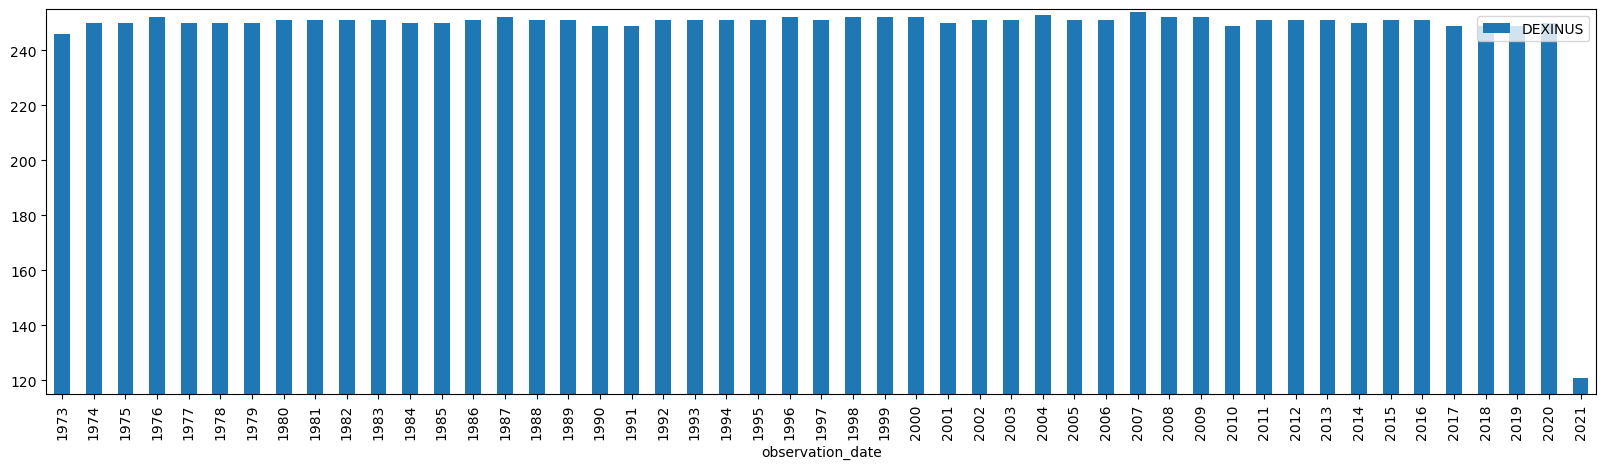

In [4]:
print(rawData.info())
rawData.groupby(rawData.index.year).count().plot(kind='bar',figsize=(20,5),ylim=(115,255))
print('\nNumber of days in each year ')
print('----------------------------')
plt.show()

In [5]:
print('\nNumber of observed days in each year ')
print('-------------------------------------')
rawData.groupby(rawData.index.year).count().sort_values(by=['DEXINUS']).T


Number of observed days in each year 
-------------------------------------


observation_date,2021,1973,2019,2010,1991,2018,2017,1990,1975,2020,...,1976,1999,2000,2009,2008,1996,1987,1998,2004,2007
DEXINUS,121,246,249,249,249,249,249,249,250,250,...,252,252,252,252,252,252,252,252,253,254


In [6]:
# 365-104-12-2,366-104-10+2


Heat map for null values in the dataset 
---------------------------------------


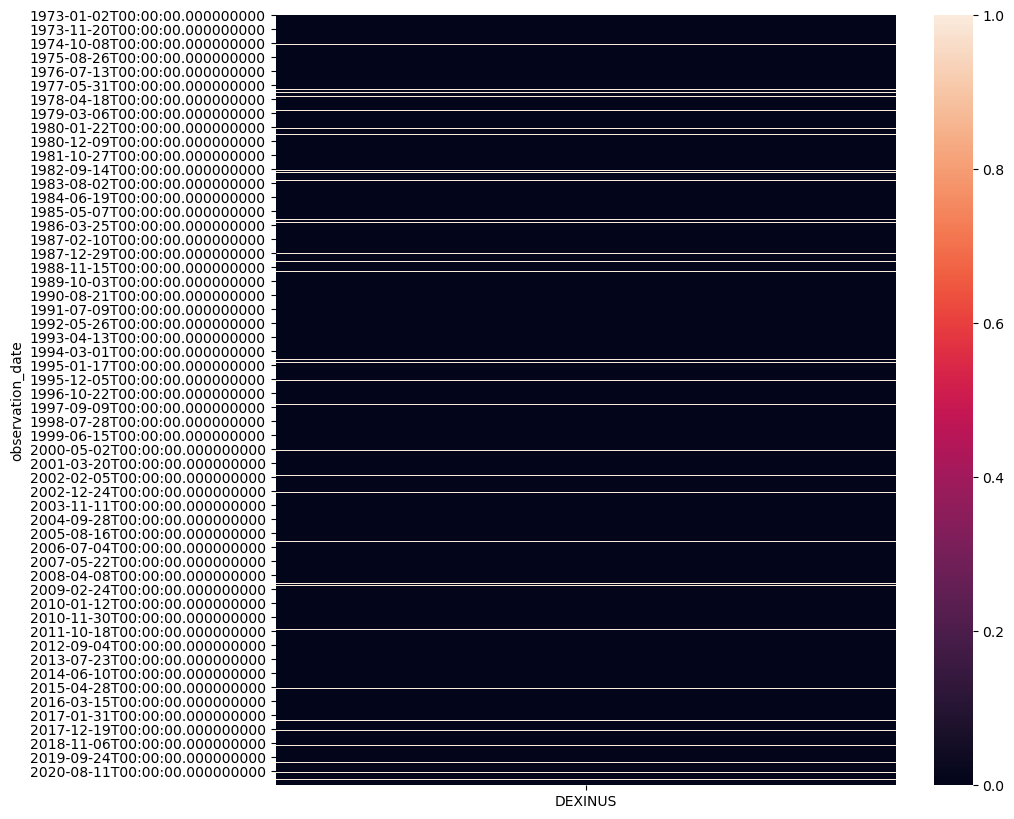

Count of null values in dataset is : 494


In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(rawData.isnull())
print('\nHeat map for null values in the dataset ')
print('---------------------------------------')
plt.show()
print(
    f'Count of null values in dataset is : {len(rawData)-rawData.DEXINUS.count()}'
)

**Overall there are 494 null values in the dataset. and the DEXINUS column is marked as float64 correctly.**

Explanation for null values in the data

All these null values are mainly because of US holidays. The holidays are as follows:
* Dr. Martin Luther King Jr. Day (January 15 - 19)
* President’s Day (February 12 - 16)
* Good Friday (April 1 - 5)
* Memorial Day (May 28 - June 1)
* Independence Day (July 2 - 5)
* Labor Day (September 3 - 7)
* Thanksgiving (November 24 - 26)
* Christmas (December 23 - 27)
* New Year’s (December 30 - January 3)

`The idea is that, that missing values in the data are because of exchange holidays. The currency exchange markets are closed on Saturday and Sunday and on public holidays as declared by the Federal Reserve of America.`

`Two ways to approach missing values problem:`
* There will no trading on public holidays, hence there will be no prevailing exchange rates for such holidays. Hence, Drop the missing values from the dataset.
* The previous closing will prevail till the next trading day. Hence, impute the previous closing using 'ffill' technique

**However, since the holidays change every year we simply can not drop values. This will lead to the problem of discontinuation of data. it was easy to delete the `NAN` values if they all fell on same day of each year. Dropping of `NAN` values will affect our predictions also. HENCE, WE CHOOSE NOT TO DROP THE NULL VALUES. INSTEAD WE IMPUTE THEM WITH PREVIOUS CLOSING.**

## Data Preparation

* **Fabricate new columns for 'Year', 'Month', 'YrMonth' for analysis**
        We shall extract 'Year', 'Month', 'YrMonth' for grouping and analysis.
* **Create a copy of the data with imputed null values**

### Frabrication of new columns

In [8]:
rawData['Year'] = rawData.index.year
rawData['Month'] = rawData.index.month
rawData['YrMonth'] = rawData.index.to_period('M')
rawData

,DEXINUS,Year,Month,YrMonth
observation_date,,,,
1973-01-02,8.02,1973,1,1973-01
1973-01-03,8.02,1973,1,1973-01
1973-01-04,8.00,1973,1,1973-01
1973-01-05,8.01,1973,1,1973-01
1973-01-08,8.00,1973,1,1973-01
...,...,...,...,...
2021-06-21,74.18,2021,6,2021-06
2021-06-22,74.37,2021,6,2021-06
2021-06-23,74.13,2021,6,2021-06


### Creating a copy of data by imputing missing values using 'ffill technique'

In [9]:
data_impu_na = rawData.copy(deep=True)
data_impu_na['DEXINUS'].fillna(method='ffill', inplace=True)
data_impu_na.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   DEXINUS  12649 non-null  float64  
 1   Year     12649 non-null  int64    
 2   Month    12649 non-null  int64    
 3   YrMonth  12649 non-null  period[M]
dtypes: float64(1), int64(2), period[M](1)
memory usage: 494.1 KB


In [10]:
data_impu_na.head(3)
print('\nImputed dataset for 1973-2021 ')
print('------------------------------')


Imputed dataset for 1973-2021 
------------------------------


# Visualizing - Trend, Cycle, Seasonality & Noise
* Basic line plot
* Line plot - plotted for every 10 year interval with shared y axis
* Box plot - plotted for every 5 year interval and for every year
* Line plot - plotted annually to check the annual variation and seasonality

## Basic line plot

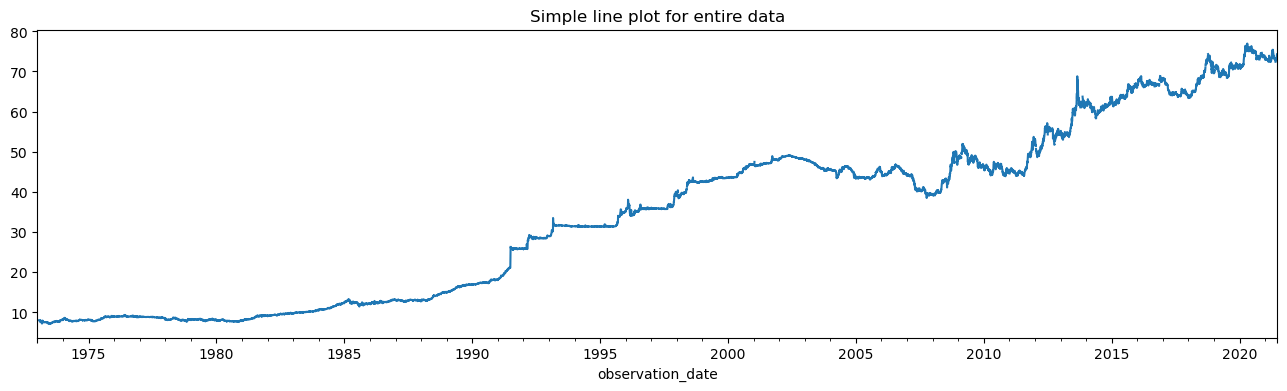

In [11]:
rawData.DEXINUS.plot(figsize=(16,4))
plt.title('Simple line plot for entire data')
plt.show()

## Line plot for 10 year interval


10 Year line plot with Shared y axis on same scale 
--------------------------------------------------


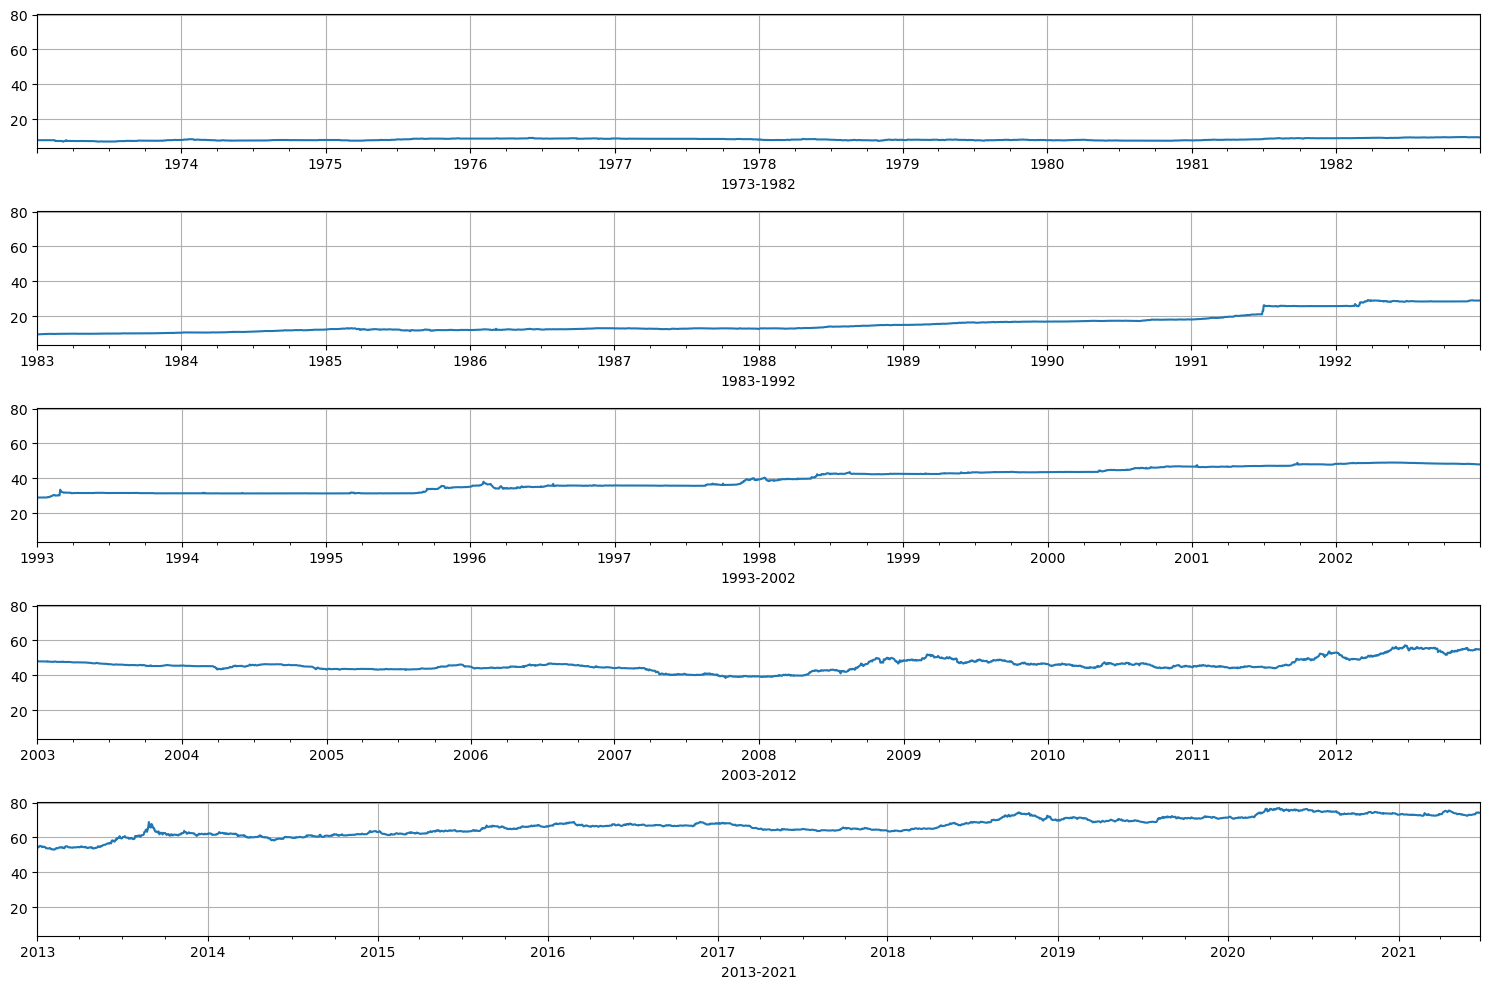

In [12]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharey=True)
data_impu_na.loc['1973':'1982']['DEXINUS'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
data_impu_na.loc['1983':'1992']['DEXINUS'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
data_impu_na.loc['1993':'2002']['DEXINUS'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
data_impu_na.loc['2003':'2012']['DEXINUS'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
data_impu_na.loc['2013':'2022']['DEXINUS'].plot(xlabel="2013-2021",
                                                ax=ax[4],
                                                grid=True)
plt.tight_layout()
print('\n10 Year line plot with Shared y axis on same scale ')
print('--------------------------------------------------')
plt.show()

**WE HAVE TOTAL 47.5 YEARS OF DATA FOR ANALYSIS.** HENCE, CHOSE TO STUDY - INTERVAL OF 10 YEARS TO START WITH
* **For the first 10 years the trend is almost flat and zero variations.**
* **For next 10 years the trend is slightly incremental and no variations for majority of the years. we can only see the increase in the last two years of the decade.**
* **For Third decade the trend is incremental and there are minor variations.**
* **For last decade we can see the trend is incremental and there are strong fluctuation in the data.**

**Line plot for 10 year interval without a shared 'y' axis**


10 year line graph with independent y axis 
------------------------------------------


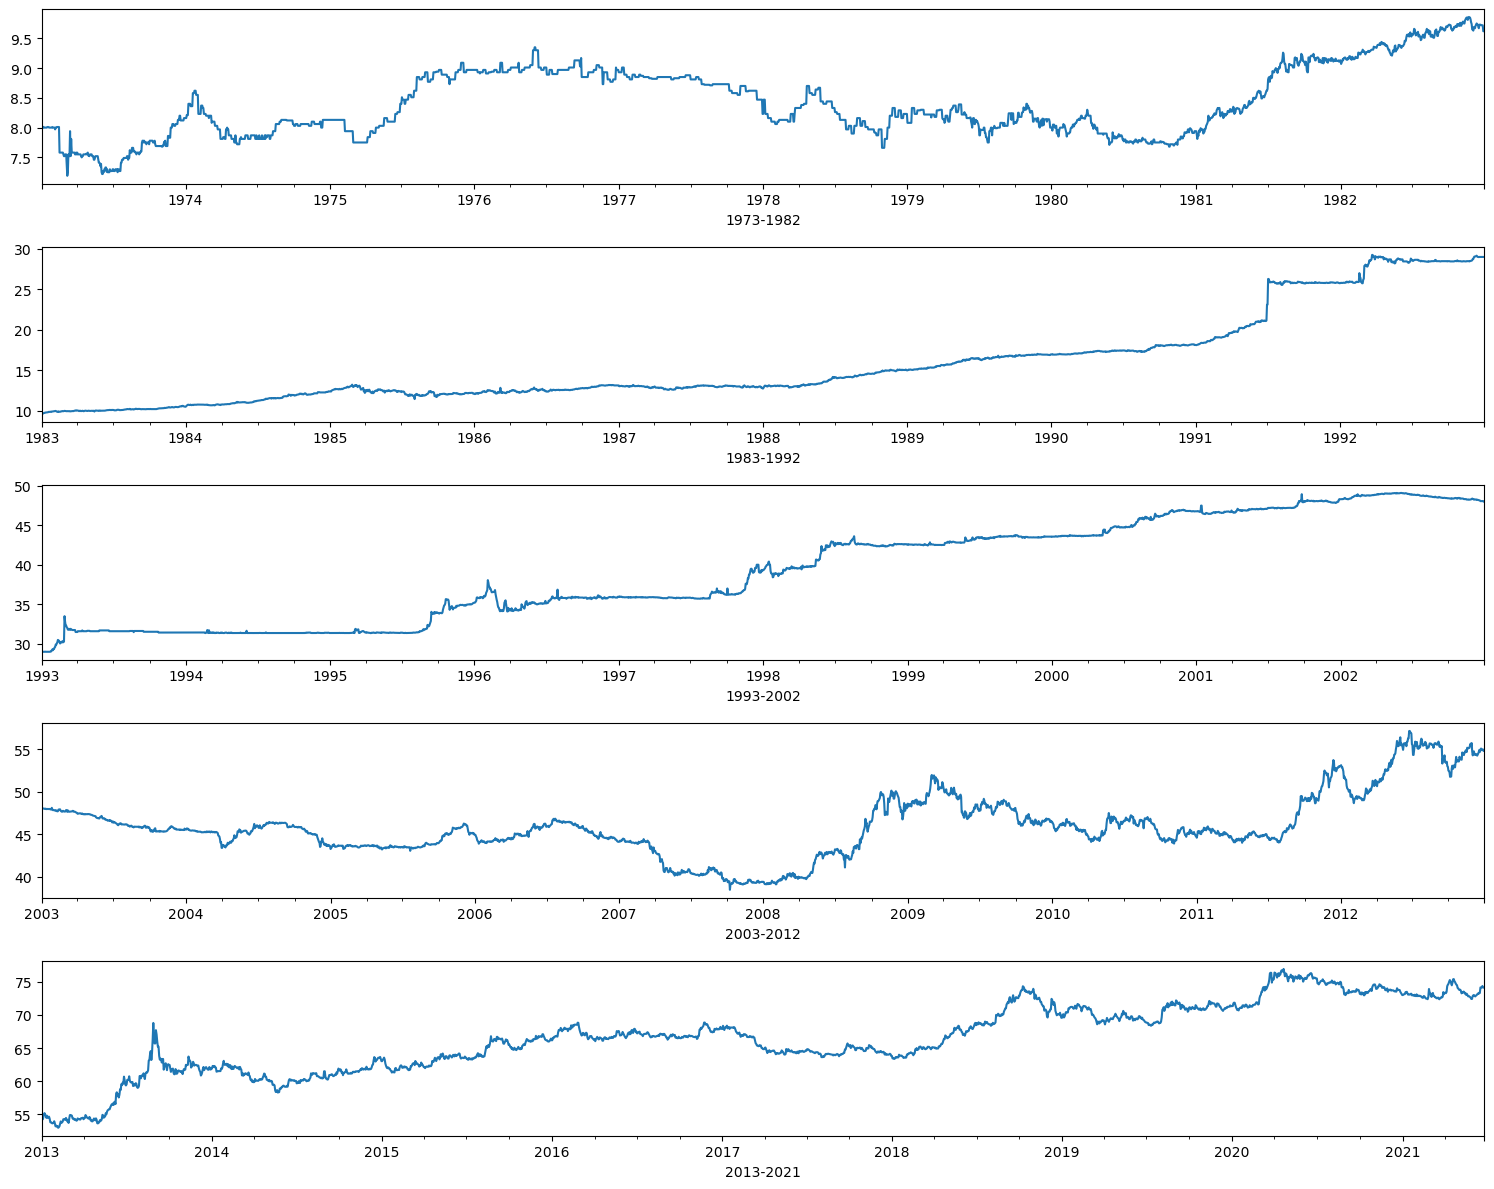

In [13]:
fig, ax = plt.subplots(5, 1, figsize=(15, 12))
data_impu_na.loc['1973':'1982']['DEXINUS'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0])
data_impu_na.loc['1983':'1992']['DEXINUS'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1])
data_impu_na.loc['1993':'2002']['DEXINUS'].plot(xlabel="1993-2002", ax=ax[2])
data_impu_na.loc['2003':'2012']['DEXINUS'].plot(xlabel="2003-2012", ax=ax[3])
data_impu_na.loc['2013':'2022']['DEXINUS'].plot(xlabel="2013-2021", ax=ax[4])
plt.tight_layout()
print('\n10 year line graph with independent y axis ')
print('------------------------------------------')
plt.show()

As we can note from the above chart that the currency movement are range bound as first decade showing only movement of ~₹2/- while the rest of the decade show minimum movement of ₹20/- and max of ₹30/-. One more major thing to note is that the Volatility in the market has increased since 2008 and it sis still prevailing.

## Box plot for 5 year intervals


Box plot with for 5 year interval 
-----------------------------------


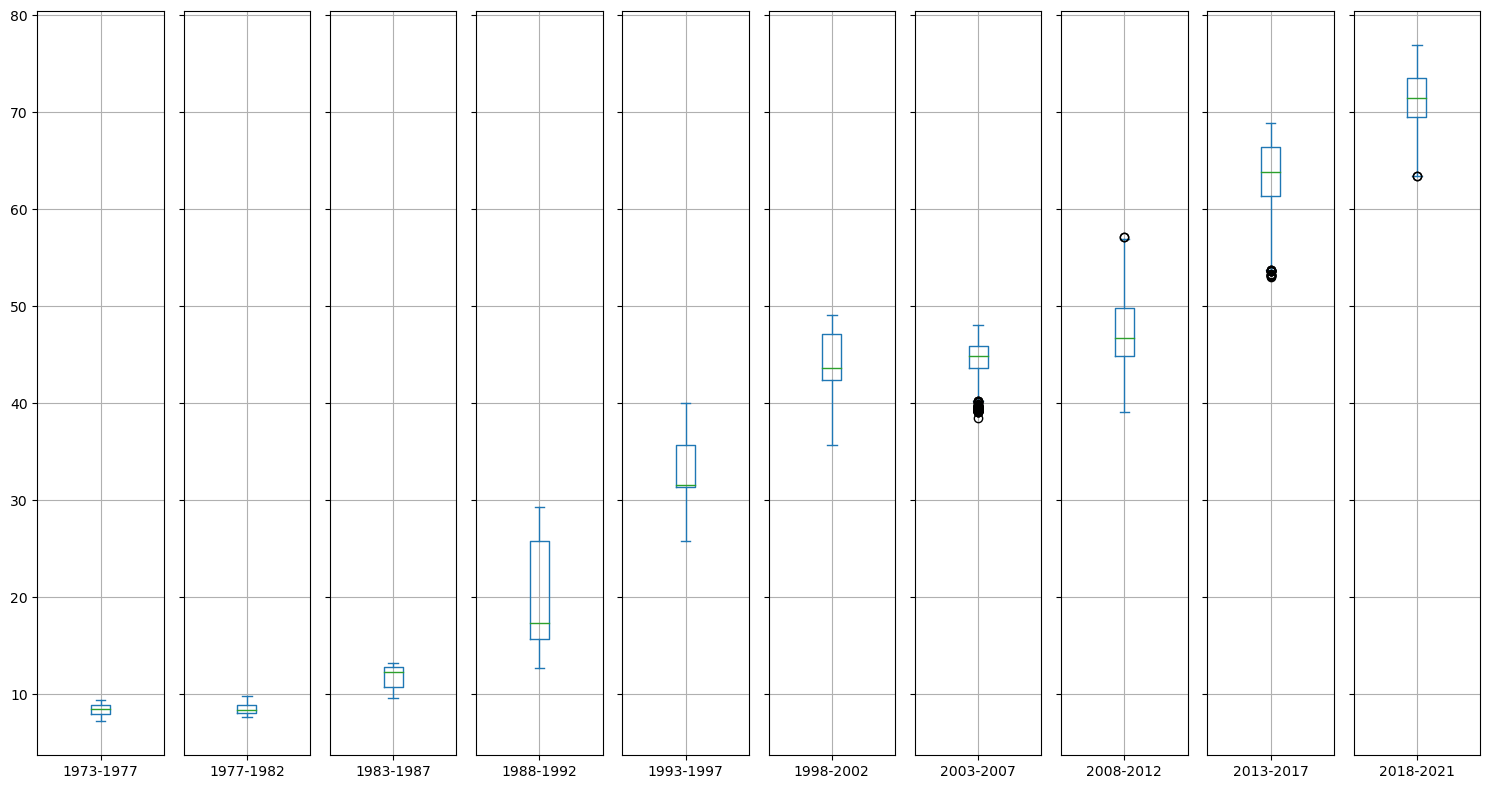

In [14]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
data_impu_na.loc['1973':'1977']['DEXINUS'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
data_impu_na.loc['1977':'1982']['DEXINUS'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
data_impu_na.loc['1983':'1987']['DEXINUS'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
data_impu_na.loc['1988':'1992']['DEXINUS'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
data_impu_na.loc['1992':'1997']['DEXINUS'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
data_impu_na.loc['1997':'2002']['DEXINUS'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
data_impu_na.loc['2003':'2007']['DEXINUS'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
data_impu_na.loc['2008':'2012']['DEXINUS'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
data_impu_na.loc['2013':'2017']['DEXINUS'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
data_impu_na.loc['2018':'2021']['DEXINUS'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
print('\nBox plot with for 5 year interval ')
print('-----------------------------------')
plt.show()

If we closely observe the median values we note that there are two flat trends one from 1973 to 1982 and from 1998 to 2012, also there are two positive trends from 1983 to 2002 and from 2008 to 2021.

Further, the range of variate is very low in the beginning and range is on the higher side from 1988 onwards.

## Annual Box Plot


Annual Box plot with Trend and varience 
--------------------------------------


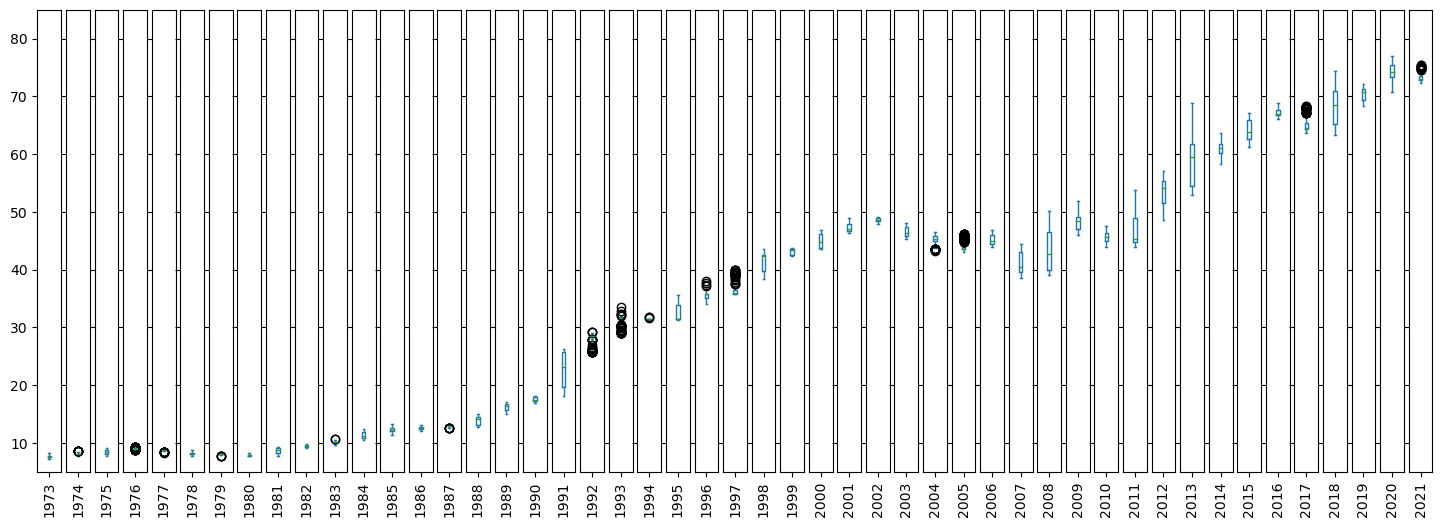

In [15]:
# G.DEXINUS.plot(subplots=True,kind='box')
# data_impu_na.groupby('Year').plot(y = 'DEXINUS',kind='box',subplots=True)
G = data_impu_na.groupby('Year')

years = list(np.unique(data_impu_na.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 6), sharey=True)
for i, year in enumerate(years):
    X = G.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='DEXINUS',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
# fig.set_title('Annual box plot with trend and varience')
print('\nAnnual Box plot with Trend and varience ')
print('--------------------------------------')
plt.show()

The annual plot mimics the 5 year plot but what we can note is that there are two event which had their impact on the currency market.

1. 1991 liberalization of economy and devaluation of rupee.
2. The WTC attack dated 11-9-2001 popularly known as attacks of 9/11

This plot clearly know that volatility in the market has picked up from 2008 onwards.

## Annual line plot

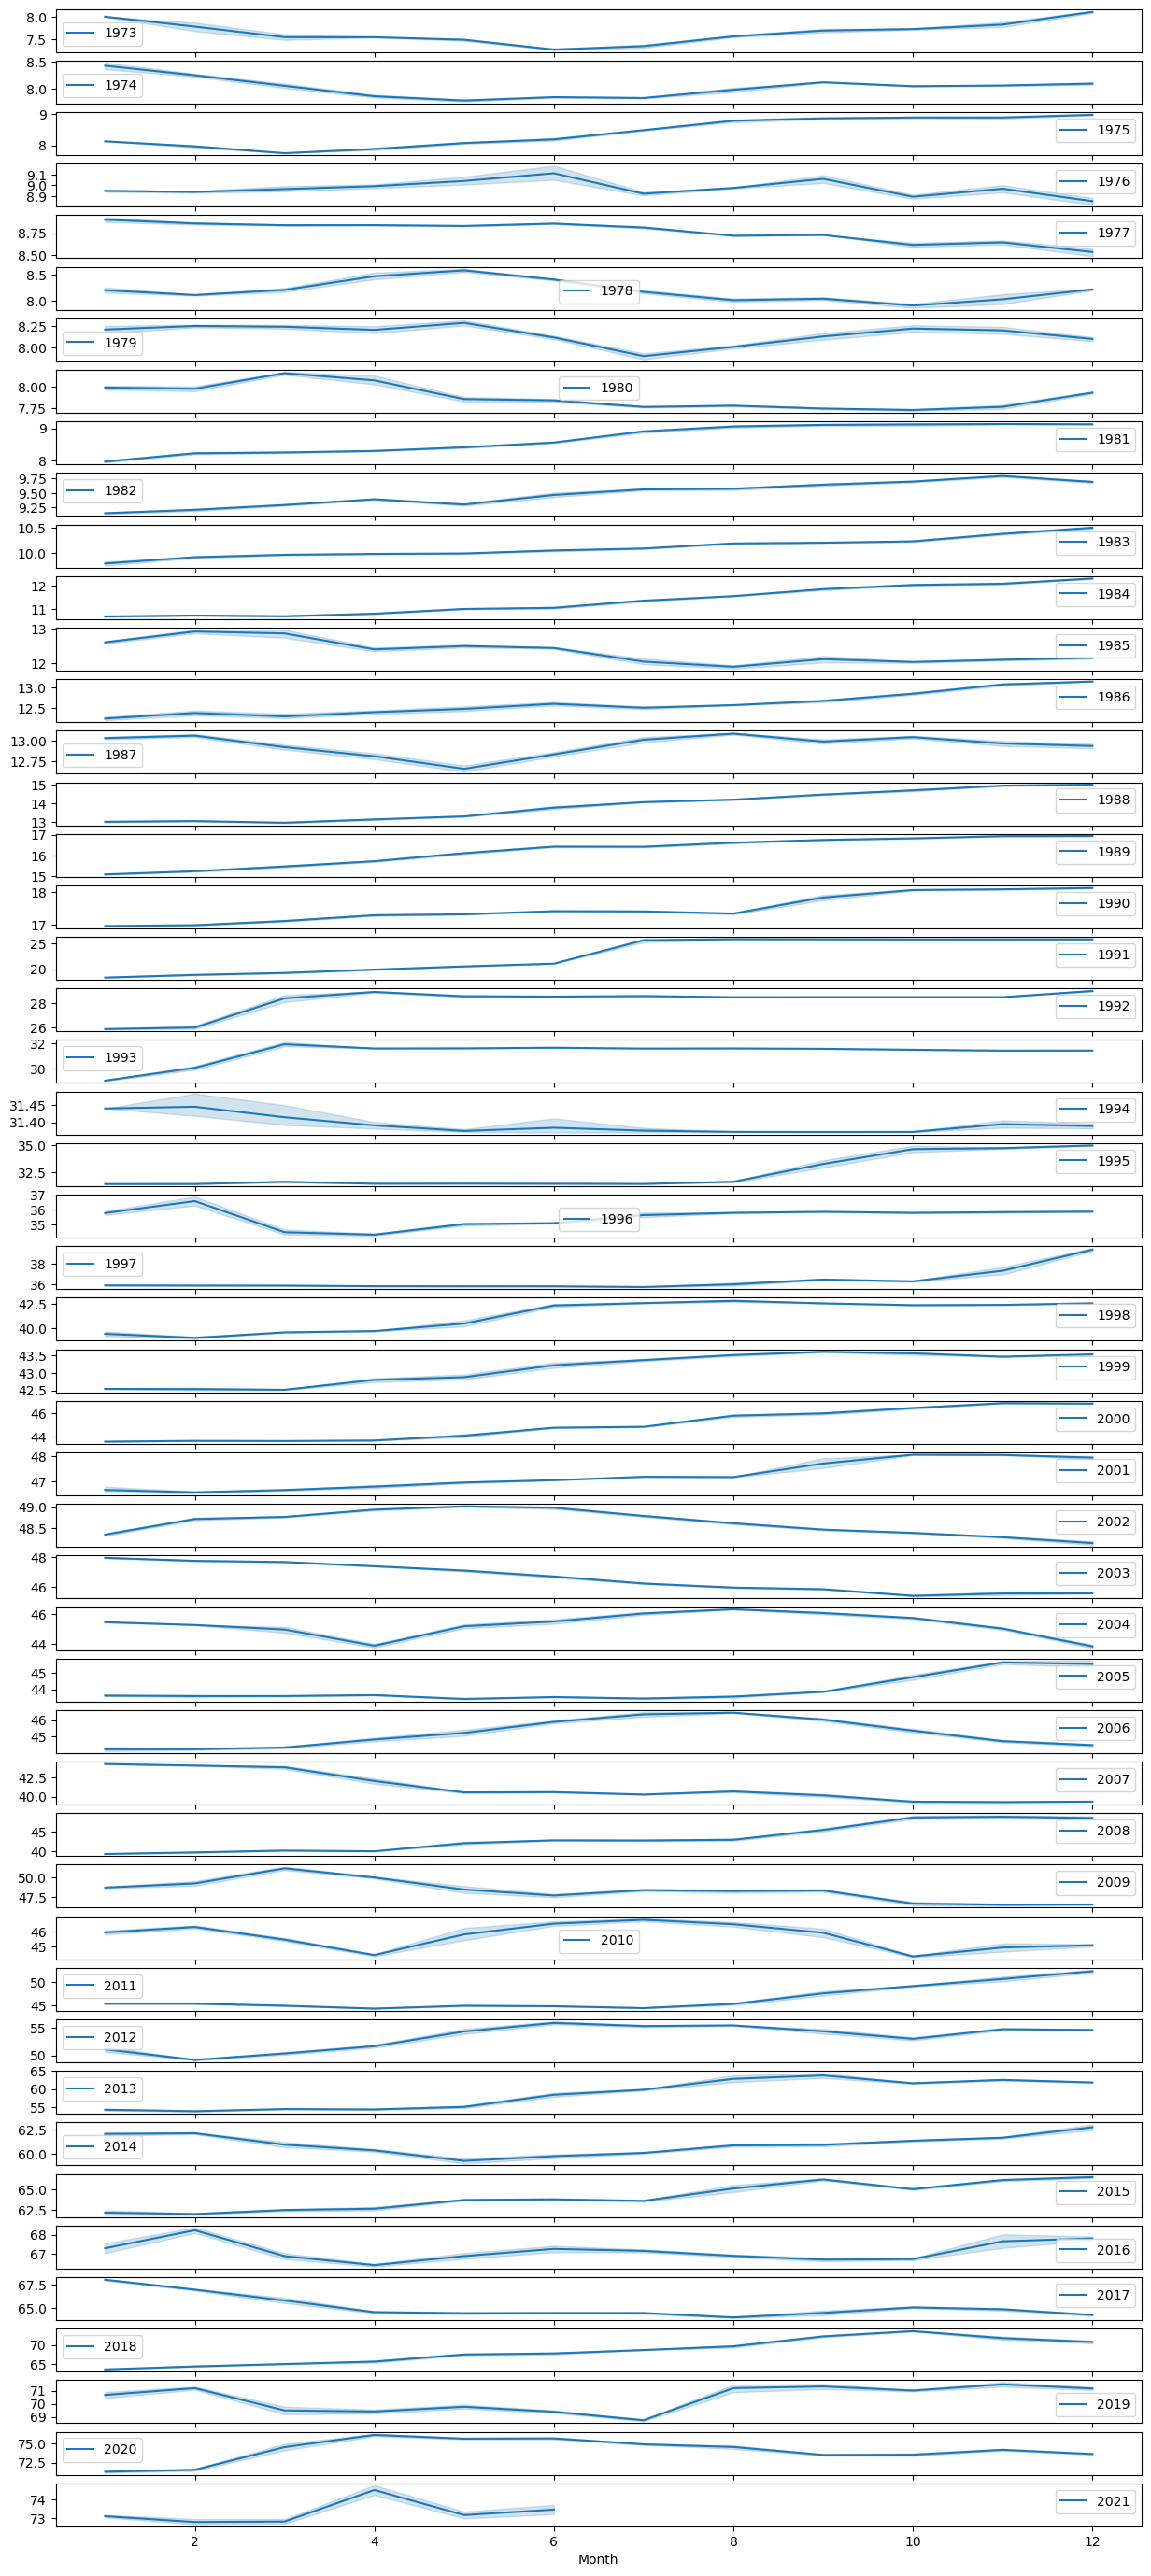

In [16]:
fig, ax = plt.subplots(len(years), 1, sharex=True,
                       figsize=(15, 35))  # ,sharey=True

for i, year in enumerate(years):
    X = G.get_group(year)
    #     X.plot(y='DEXINUS', x='Month',sharex = True, sharey = True,
    #            ax = ax[i], xlabel = 'months', label = year,figsize = (10,2)) #subplots = True,  ylabel = 'Exchange rate',
    sns.lineplot(
        y=X.iloc[:, 0],
        x=X.Month,
        ax=ax[i],
        label=year,
    )
    ax[i].set_ylabel("")
    plt.tight_layout
# fig.set_ylabel('DNXINUS')
# plt.ylabel('DNEXUS')
plt.show()

This plot was mainly plotted to study the seasonality in the data. However, there is no evidence for seasonality in the data.  

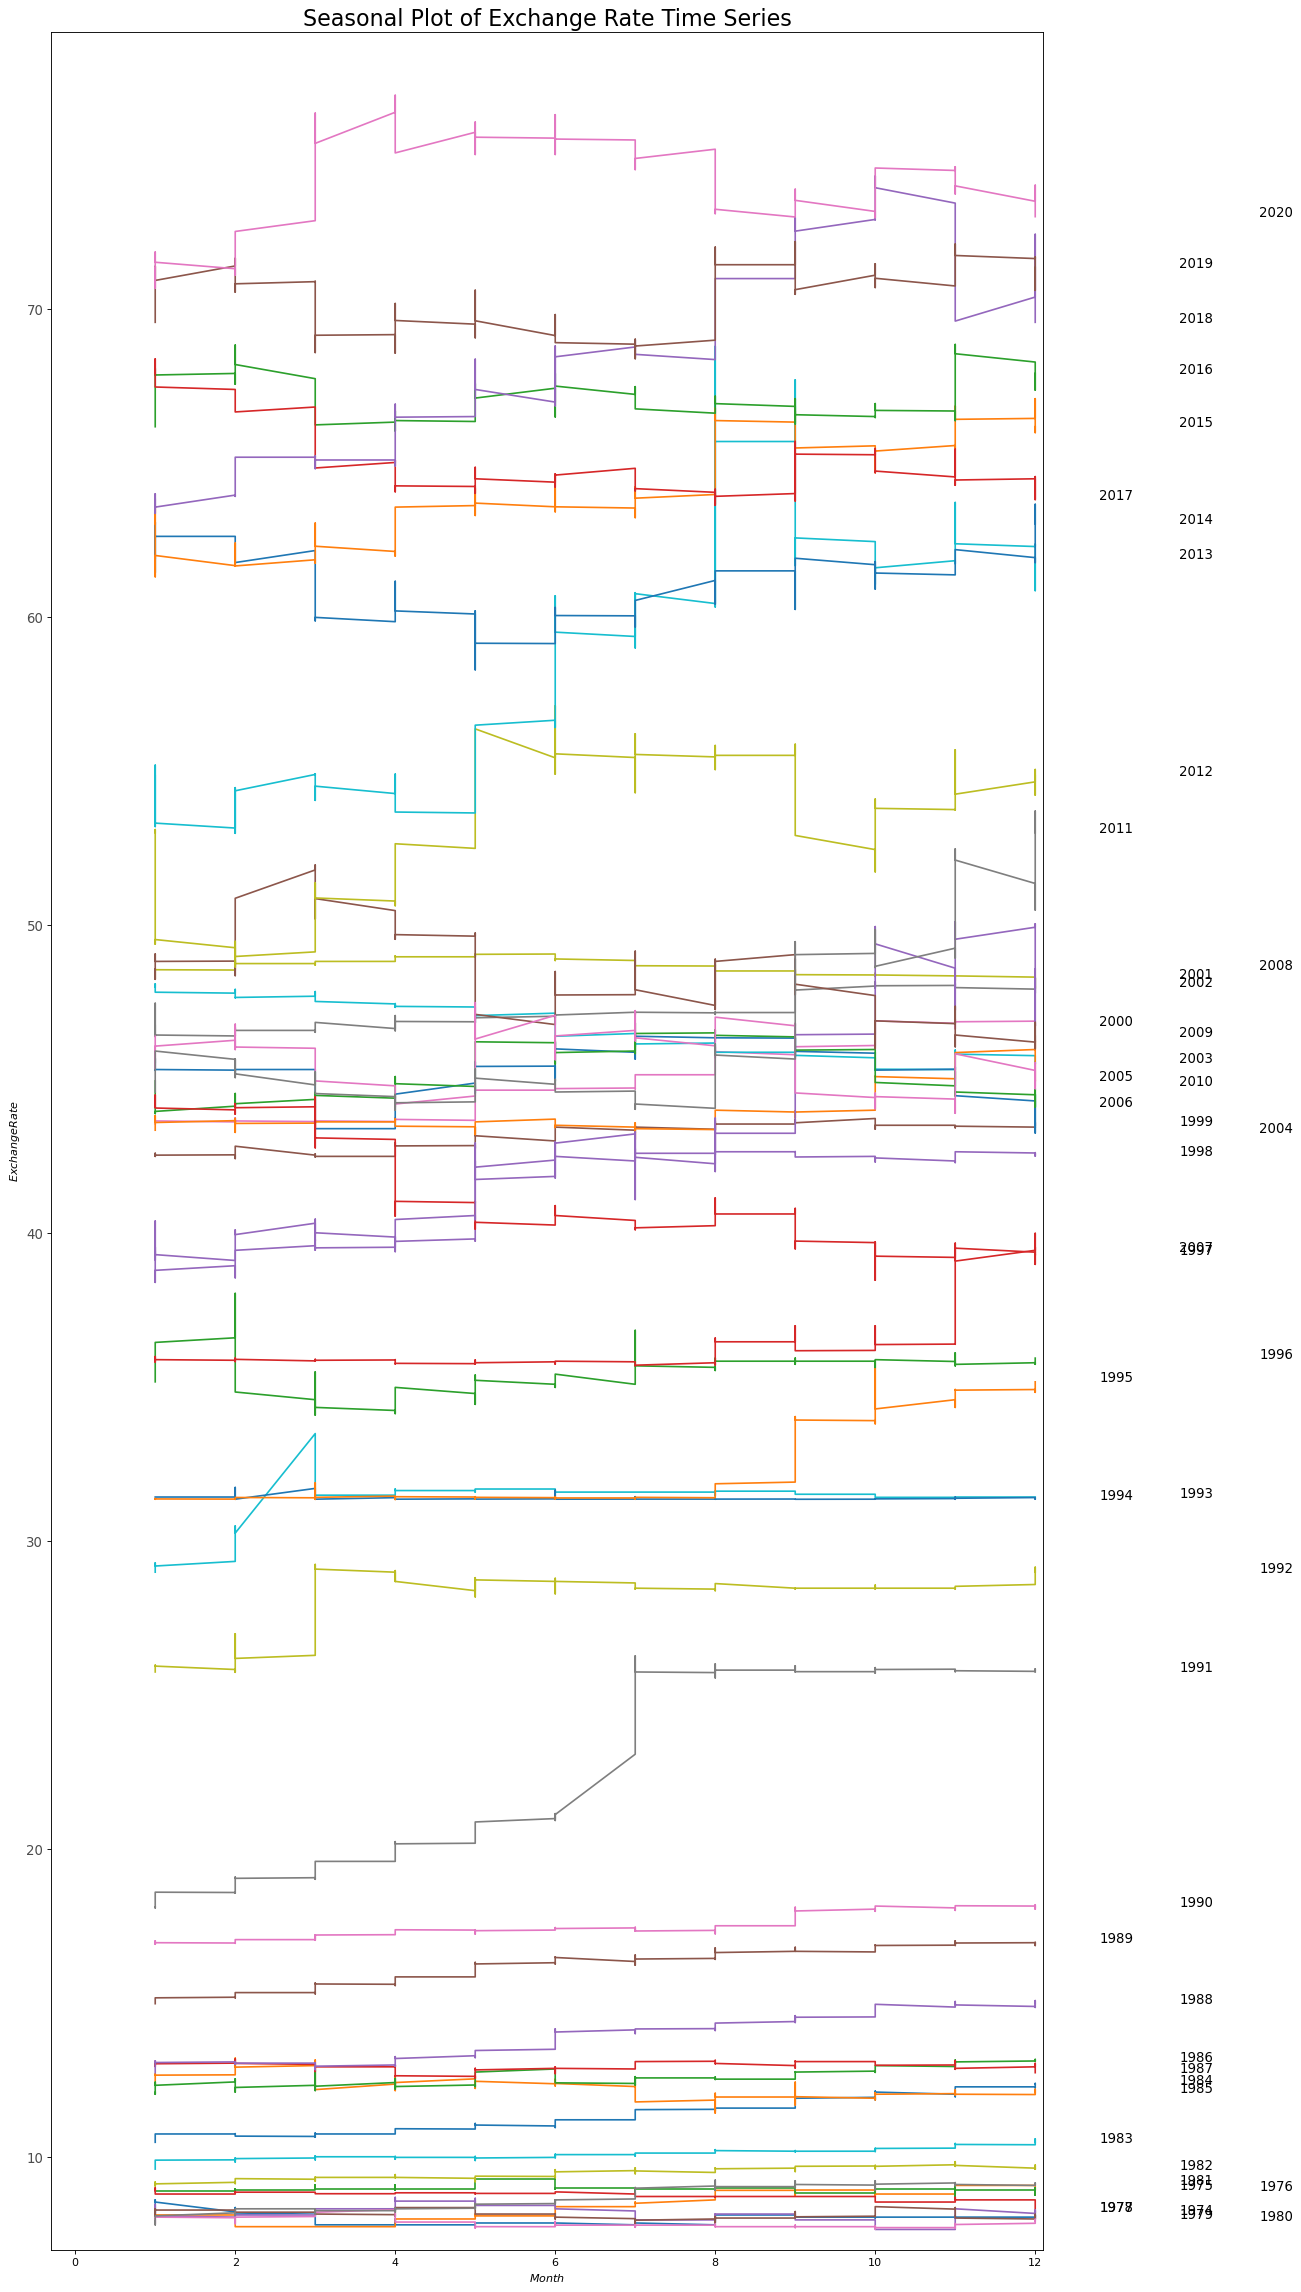

In [17]:
from dateutil.parser import parse
plt.figure(figsize=(16,36), dpi = 80)
for i, y in enumerate(years[:-1]):
    if i > 0:
        plt.plot('Month', 'DEXINUS',data = data_impu_na.loc[data_impu_na.Year == y],
             label = y)
        plt.text(data_impu_na.loc[data_impu_na.Year == y, :].shape[0] -247.2,
             data_impu_na.loc[data_impu_na.Year == y, 'DEXINUS'][-1:].values[0],
             y,
             fontsize = 12)
        
# Decoration
plt.gca().set(xlim=(-0.3, 12.1), ylim=(7, 79), ylabel='$Exchange Rate$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Exchange Rate Time Series", fontsize=20)
plt.show()

## Decomposition plot

### Additive Decomposition plot

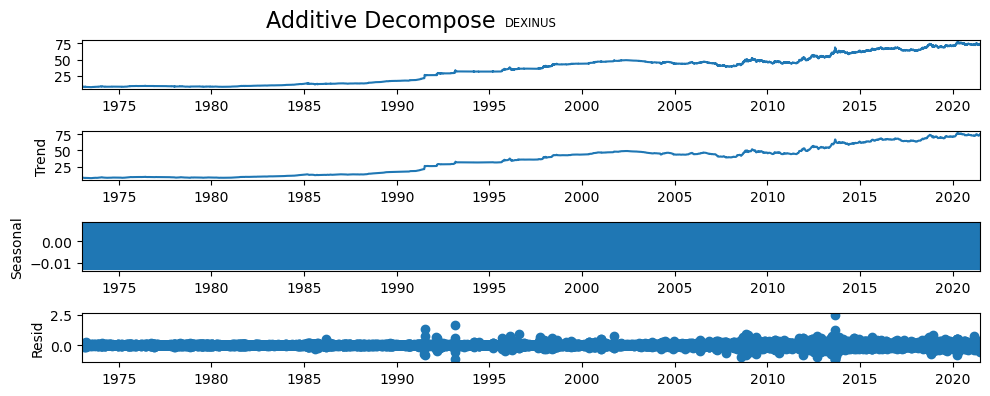

In [18]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(data_impu_na.DEXINUS, 
                                model='multiplicative',
                                extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(data_impu_na['DEXINUS'],
                                model='additive', 
                                extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,4),'axes.titlesize': 'small',
                     'axes.titlepad' : 10.0, 'axes.titleweight' : 0})
result_add.plot().suptitle('Additive Decompose', fontsize=16,ha='right')
plt.show()
# seasonal_decompose(data_impu_na.DEXINUS, period=12).plot()
# plt.show()
# plt.suptitle()

### Multiplicative Decomposition plot

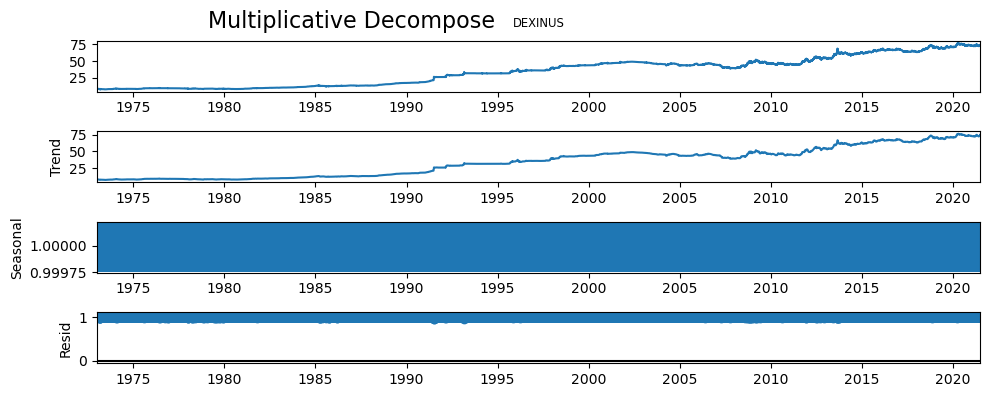

In [19]:
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16,ha='right')
plt.show()

In [20]:
# plt.rcParams.keys()

In [21]:
df_reconstructed_add = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed_add.columns = ['seas', 'trend', 'resid', 'actual_values']
print('\nValues from Decomposition plot - Additive model ')
print('-----------------------------------------------')
df_reconstructed_add


Values from Decomposition plot - Additive model 
-----------------------------------------------


,seas,trend,resid,actual_values
observation_date,,,,
1973-01-02,0.008031,8.0136,-0.001631,8.02
1973-01-03,0.001747,8.0112,0.007053,8.02
1973-01-04,-0.000420,8.0100,-0.009580,8.00
1973-01-05,-0.012841,8.0060,0.016841,8.01
1973-01-08,0.003483,8.0020,-0.005483,8.00
...,...,...,...,...
2021-06-21,0.003483,74.1960,-0.019483,74.18
2021-06-22,0.008031,74.1920,0.169969,74.37
2021-06-23,0.001747,74.1920,-0.063747,74.13


In [22]:
df_reconstructed_mul = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed_mul.columns = ['seas', 'trend', 'resid', 'actual_values']
print('\nValues from Decomposition plot - Multiplicative model ')
print('-----------------------------------------------------')
df_reconstructed_mul


Values from Decomposition plot - Multiplicative model 
-----------------------------------------------------


,seas,trend,resid,actual_values
observation_date,,,,
1973-01-02,1.000198,8.0136,1.000601,8.02
1973-01-03,0.999995,8.0112,1.001104,8.02
1973-01-04,0.999922,8.0100,0.998829,8.00
1973-01-05,0.999768,8.0060,1.000732,8.01
1973-01-08,1.000117,8.0020,0.999633,8.00
...,...,...,...,...
2021-06-21,1.000117,74.1960,0.999668,74.18
2021-06-22,1.000198,74.1920,1.002201,74.37
2021-06-23,0.999995,74.1920,0.999169,74.13


* As discussed above decomposition plot confirms trend in the data.
* It is evident that there is no seasonality in the data.
* lastly, the resid plot shows the volatility in the data is on the rise.  

## Plotting the De-trended data

### De-trended by subtracting the least squares fit

In [23]:
plt.rcParams.update({'figure.figsize' : (15,2.5)})
from scipy import signal
detrended = signal.detrend(data_impu_na.DEXINUS.values)
plt.plot(detrended)
plt.title('Exchange rates detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Exchange rates detrended by subtracting the least squares fit')

**So, Once you detrend the data using Regression line you can see no consistent patterns Which further ascertains our claim that there is no seasonality.**

### De-trended by removing the trend - decomposition plot values - Multiplicative model

In [24]:
detrended = data_impu_na.DEXINUS.values / result_mul.trend
plt.plot(detrended)
plt.title('Exchange rates detrended by removing the trend component - multiplicative model', fontsize=16)

Text(0.5, 1.0, 'Exchange rates detrended by removing the trend component - multiplicative model')

### De-trended by subtracting the trend - Decomposition plot values - Additive model

In [25]:
detrended = data_impu_na.DEXINUS.values - result_add.trend
plt.plot(detrended)
plt.title('Exchange rates detrended by subtracting the trend component - Additive model', fontsize=16)

Text(0.5, 1.0, 'Exchange rates detrended by subtracting the trend component - Additive model')

**So, Detrended data using Decomposition values show that the data is stationary. Which further supports our claim of no seasonality.**

**One thing to notice is that the Detrended plot for Multiplicative model is centered around `1` and the Detrended plot for Additive model is centered around `0`.** 

**This is because of the nature of mathematical formula, while Multiplicative model multiplies the components and additive model adds the components to calculate the final observed values.**

**OTHERWISE THE PLOTS SHOW THAT THERE IS NO SEASONLITY**

## Plotting the De-seasonalized Data

### Deseasonalised using Decomposition plot values Multiplicative model

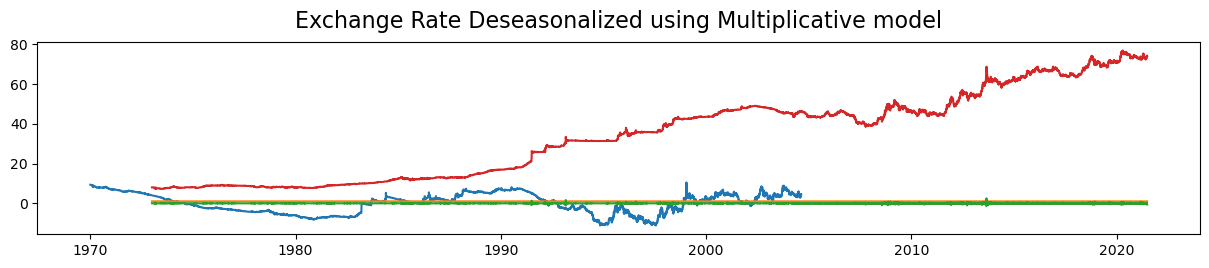

In [26]:
plt.rcParams.update({'figure.figsize' : (15,2.5)})
deseasonalized_mul = data_impu_na.DEXINUS.values / result_mul.seasonal
plt.plot(deseasonalized_mul)
plt.title('Exchange Rate Deseasonalized using Multiplicative model', fontsize=16)
plt.show()

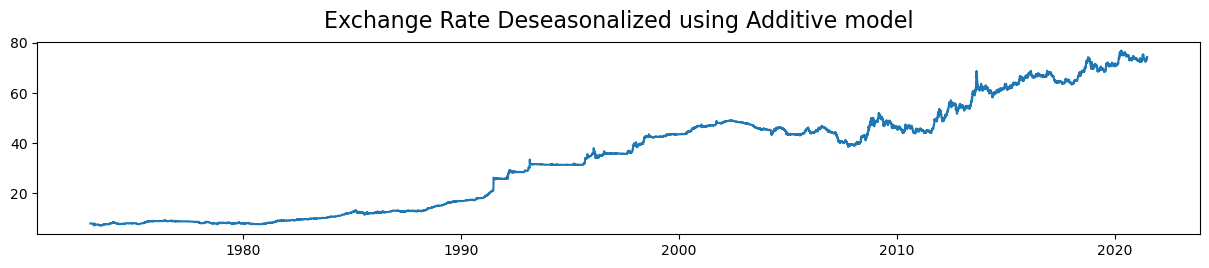

In [27]:
plt.rcParams.update({'figure.figsize' : (15,2.5)})
deseasonalized_add = data_impu_na.DEXINUS.values - result_add.seasonal
plt.plot(deseasonalized_add)
plt.title('Exchange Rate Deseasonalized using Additive model', fontsize=16)
plt.show()

Deseasonalised plots show the same graph as the original graph. not much to comment about.

In [28]:
# from statsmodels.nonparametric.smoothers_lowess import lowess

Observations - Trend, Seasonality, Cycle, Noise
---
While we can see the trend in the data but there is no evidence of seasonality in the data.

Though the trend is evident the trend is not constant. Further, we can confirm that the data is not cyclic.

There is Volatility in the data and the volatility has increased over the period of time. but we can not see any pattern in the increment of volatility. This volatility in the data can be treated as noise there is no explanation for such movements. We can address this problem by using smoothing techniques

# Smooting plots

As observed above smoothing will reduce the noise in the data. The plot below show that smoothing window of 12 or 24 would be good enough.

Since there is no seasonal component, smoothing techniques / smoothing based models like Holts winters may perform better on such dataset. let us try.

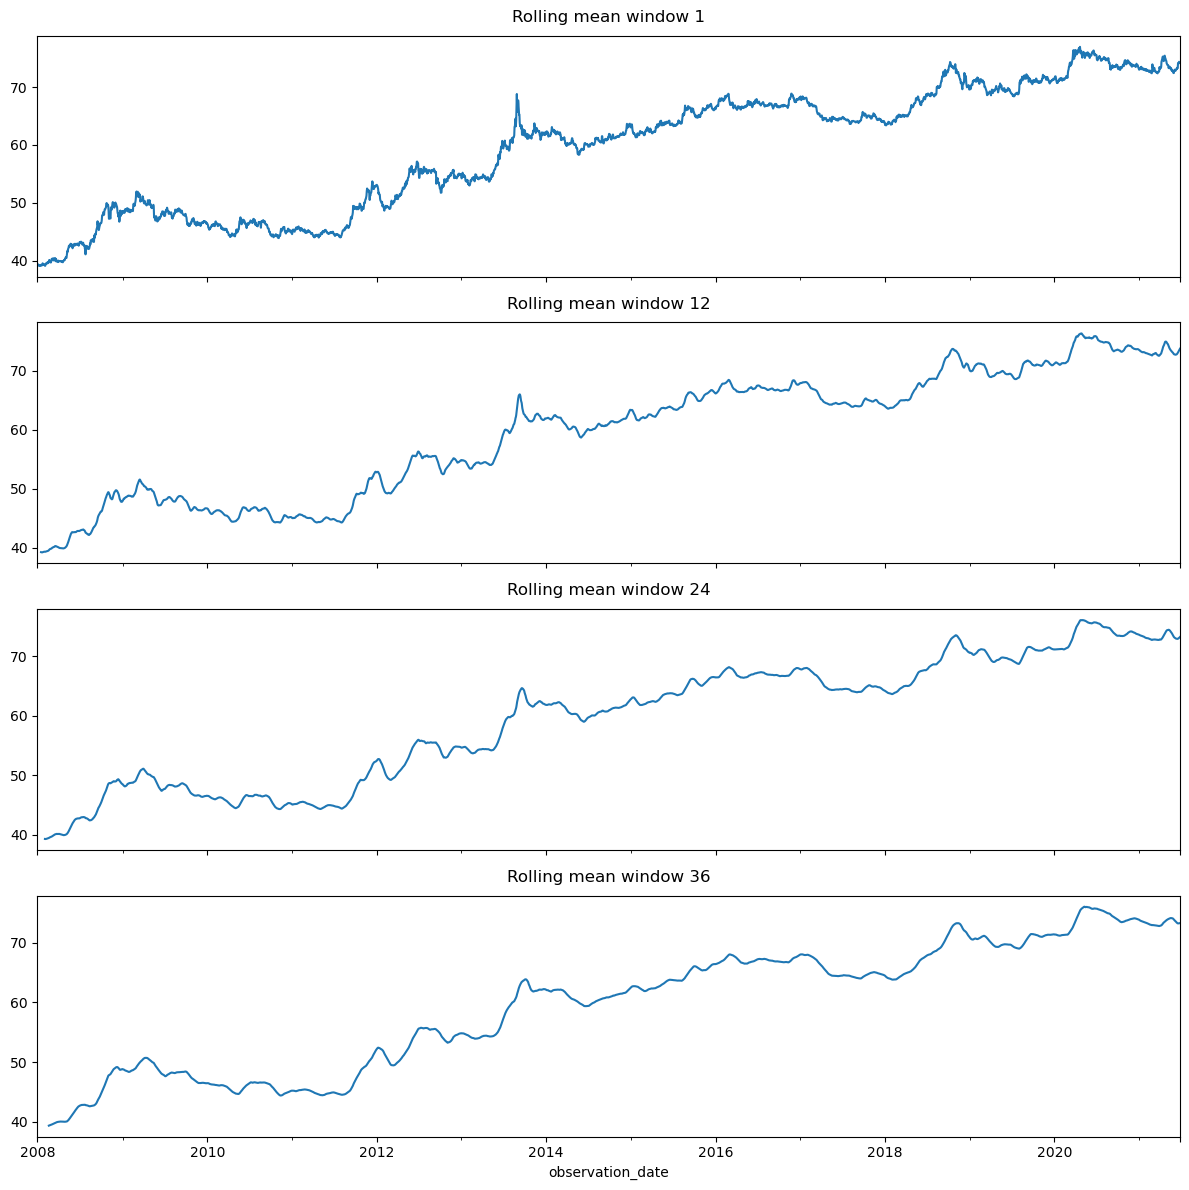

In [29]:
plt.rcParams.update({'axes.titlesize' : 'large'})
f,ax = plt.subplots(4,1,figsize=(12,12),sharex=True,)
xa = 0
for i in range(0,40,12):
    if i == 0:
        data_impu_na.DEXINUS.loc[data_impu_na.index.year >= 2008].rolling(window = i+1,
        min_periods = None,
        center = False,
        win_type = None,
        on = None,
        axis = 0,
        closed = None,).mean().plot(ax = ax[xa], label = f'lag {i+1}')
        ax[xa].set_title(f'Rolling mean window {i+1}')
    else:
        data_impu_na.DEXINUS.loc[data_impu_na.index.year >= 2008].rolling(window = i,
        min_periods = None,
        center = False,
        win_type = None,
        on = None,
        axis = 0,
        closed = None,).mean().plot(ax = ax[xa], label = f'lag {i}')
        ax[xa].set_title(f'Rolling mean window {i}')
    xa += 1
plt.tight_layout()    
plt.show()


# Visualizing - Correlation
* Lag plot
* Auto-Correlation
* Partial Auto-Correlation

## Lag Plot

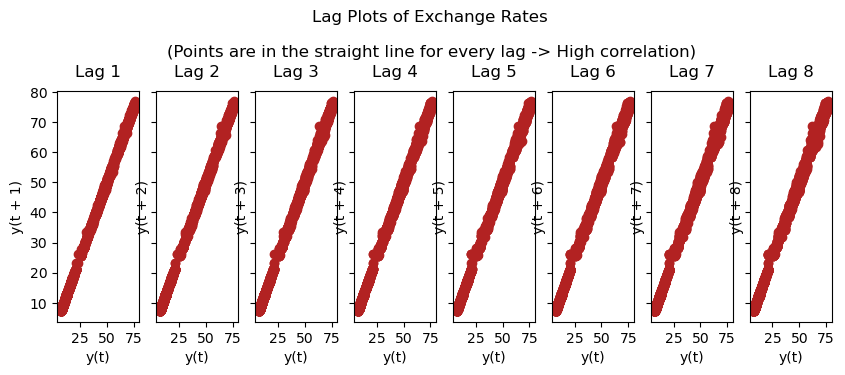

In [30]:
fig, axes = plt.subplots(1,
                         8,
                         figsize=(10, 3),
                         sharex=True,
                         sharey=True,
                         dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    pd.plotting.lag_plot(data_impu_na.DEXINUS, lag=i + 1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i + 1))

fig.suptitle(
    '''Lag Plots of Exchange Rates 
    \n(Points are in the straight line for every lag -> High correlation)\n''',
    y=1.15)
plt.show()

## ACF and PACF plots

In [31]:
print('\n\033[1m','\033[7m' + '\033[93m' + 'ACF values for original data with NaN Values ' + '\033[0m')
print(' ---------------------------------------------')
print(acf(rawData.DEXINUS, nlags=20, fft=False),
      end='\n\n')  # Calculating ACF on rawData
print('\n\033[1m','\033[7m' + '\033[93m' + 'ACF values for original data with no NaN Values ' + '\033[0m')
print(' ------------------------------------------------')
print(acf(data_impu_na.DEXINUS, nlags=20, fft=False),
      end='\n\n')  # Calculating ACF on Data_impu_NA


 ACF values for original data with NaN Values 
 ---------------------------------------------
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]


 ACF values for original data with no NaN Values 
 ------------------------------------------------
[1.         0.99976293 0.99952811 0.99929655 0.99906418 0.9988307
 0.99859366 0.99835785 0.99812891 0.99789877 0.99766864 0.99743762
 0.99720686 0.99697664 0.9967463  0.99651666 0.99628548 0.99605324
 0.99582165 0.99559202 0.99536435]



In [32]:
np.set_printoptions(precision=4,suppress=True)
print('\n\033[1m','\033[7m' + '\033[93m' + 'PACF values for first 40 lags ' + '\033[0m')
print(' -------------------------------')
print(pacf(data_impu_na.DEXINUS, nlags=20, method='ywadjusted', alpha=None))


 PACF values for first 40 lags 
 -------------------------------
[ 1.      0.9998  0.007   0.0102 -0.0026 -0.0036 -0.0116  0.0035  0.0214
 -0.0034  0.0003 -0.0031  0.0004  0.0011 -0.0003  0.0025 -0.0051 -0.0036
  0.0016  0.0061  0.0062]


**Observations**

* As rawData contains null values the calculation of lags will yield null values hence acf is not being calculated for rawData.

* ACF values for the data_impu_na both show very high correlation.


 ACF and PACF plots 
 --------------------


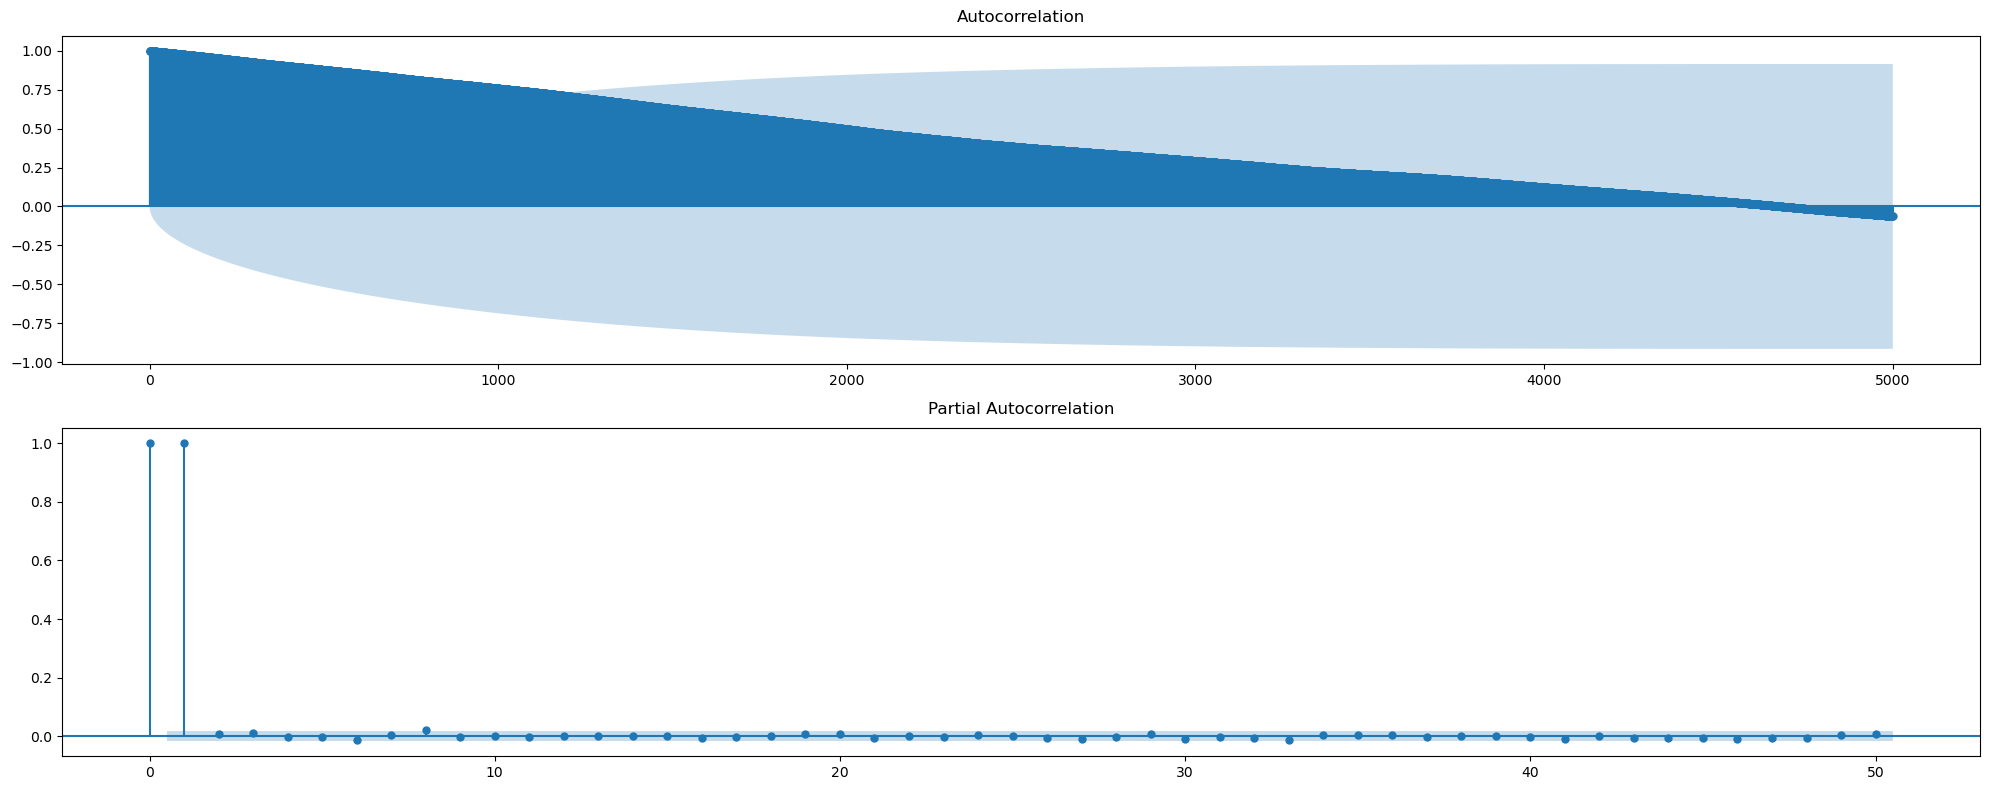

In [33]:
print('\n\033[1m','\033[7m' + '\033[93m' + 'ACF and PACF plots ' + '\033[0m')
print(' --------------------')
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
plot_acf(data_impu_na.DEXINUS, lags = 5000, ax=ax[0])
plot_pacf(data_impu_na.DEXINUS, lags = 50, ax=ax[1])
plt.tight_layout()
plt.show()

* Autocorrelation plot :- Almost every lag shows same level of correlation with our y variable
* Partial Autocorrelation :- only one lag i.e. lag-1 is sufficient to predict y, with correlation coefficient of 0.99.

## Auto-Correlation Plot

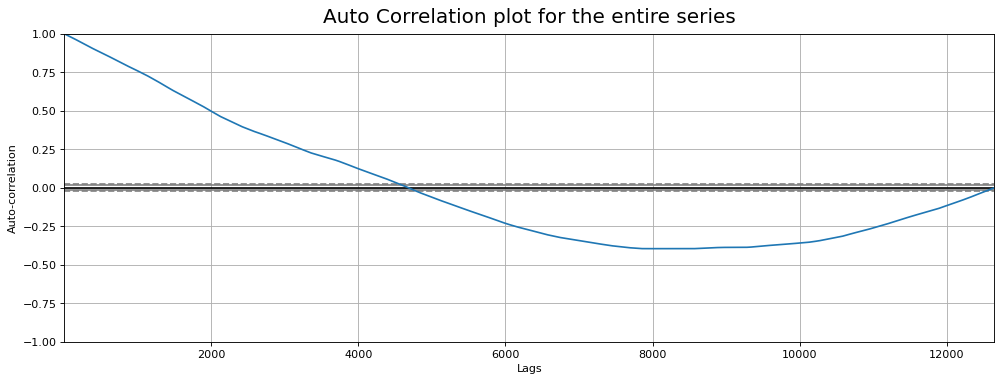

In [34]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':80})
pd.plotting.autocorrelation_plot(data_impu_na.DEXINUS.tolist())
plt.title('Auto Correlation plot for the entire series',fontsize = 18)
plt.xlabel('Lags')
plt.ylabel('Auto-correlation')
plt.show()

## Observations - Correlation

It is evident that the There is a strong correlation amongst the lags of Exchange rate time series. ACF plot shows that about 1000 lags are significantly correlated, meaning, their correlation coefficient lie above the standard error.

The correlation coefficient values for the first 40 lags is consistently above .99, Which is a very strong positive correlation. Even the lag plots convey the same.

if we look at the entire auto-correlation plot we can note that there is negative correlation. Which indicate non constant trend especially it means that there is both positive and negative trend in the data.

# is the data Stationary?

Even though we have confirmed with various techniques that there is trend in the dataset, which clearly indicates that the data is non-stationary. 

However, there is considerable period in the beginning, i.e. from 1973 to 1990, which is a stationary data. One can easily note that the average / level is consistently hovering around 10. However, after that the data is non stationary.

We are now at the crossroads whether to take the entire dataset in our model building. since the current data is given by the trend line, in our opinion we should only take the the data after 1990.

let us check our hypothesis of both stationary and non stationary components in the data.

## Augmented Dickey Fuller Test on original Dataset

In [35]:
#  Augmented Dickey Fuller test - Whole series

from statsmodels.tsa.stattools import adfuller
# from numpy import log
result = adfuller(data_impu_na.DEXINUS.dropna())
print('\n\033[1m','\033[7m' + '\033[93m' + 'ADF on original values for 1973-2021 ','\033[0m')
print(' -------------------------------------')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


 ADF on original values for 1973-2021  
 -------------------------------------
ADF Statistic: 0.632001
p-value: 0.988378


In [36]:
#  Augmented Dickey Fuller test - pre liberalisation 1973 to 1991 

from statsmodels.tsa.stattools import adfuller
# from numpy import log
result2 = adfuller(data_impu_na.loc['1973':'1990'].DEXINUS)
print('\n\033[1m','\033[7m' + '\033[93m' + 'ADF on original values for 1973-1990 ','\033[0m')
print(' -------------------------------------')
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])


 ADF on original values for 1973-1990  
 -------------------------------------
ADF Statistic: 2.973159
p-value: 1.000000


In [37]:
#  Augmented Dickey Fuller test - post liberalisation 1991 to 2021

from statsmodels.tsa.stattools import adfuller
# from numpy import log
result4 = adfuller(data_impu_na.loc['1991':'2021'].DEXINUS)
print('\n\033[1m','\033[7m' + '\033[93m' + 'ADF on original values for 1991-2021 ','\033[0m')
print(' -------------------------------------')
print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])


 ADF on original values for 1991-2021  
 -------------------------------------
ADF Statistic: -1.141841
p-value: 0.698101


## Augmented Dickey Fuller Test on 1st order differenced data

In [38]:
#  Augmented Dickey Fuller test - Whole Series

from statsmodels.tsa.stattools import adfuller
# from numpy import log
result1 = adfuller(data_impu_na.loc['1973':'2021'].DEXINUS.diff(1)[1:])
print('\n\033[1m','\033[7m' + '\033[93m' + 'ADF on differenced values for 1973-2021 ','\033[0m\n')
# print('----------------------------------------')
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])


 ADF on differenced values for 1973-2021  

ADF Statistic: -19.055603
p-value: 0.000000


In [39]:
#  Augmented Dickey Fuller test - pre liberalisation 1973 - 1990

from statsmodels.tsa.stattools import adfuller
# from numpy import log
result3 = adfuller(data_impu_na.loc['1973':'1990'].DEXINUS.diff()[1:])
print('\n\033[1m','\033[7m' + '\033[93m' + 'ADF on differenced values for 1973-1990' + '\033[0m\n')
# print('----------------------------------------')
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])


 ADF on differenced values for 1973-1990

ADF Statistic: -28.386221
p-value: 0.000000


In [40]:
#  Augmented Dickey Fuller test - post liberalisation 1991 - 2021

from statsmodels.tsa.stattools import adfuller
# from numpy import log
result5 = adfuller(data_impu_na.loc['1991':'2021'].DEXINUS.diff().dropna())
print('\n\033[1m','\033[7m' + '\033[93m' + 'ADF on differenced values for 1991-2021' + '\033[0m\n')
# print('----------------------------------------')
print('ADF Statistic: %f' % result5[0])
print('p-value: %f' % result5[1])


 ADF on differenced values for 1991-2021

ADF Statistic: -37.986572
p-value: 0.000000


## Table showing All the Augmented Dickey Fuller Test scores

In [41]:
pd.DataFrame({'Period':['Full Series :- 1973 to 2021',
                        'Pre-liberalisation :- 1973 to 1990',
                        'Post-Liberalisation :- 1991 to 2021',
                        'Full Series :- 1973 to 2021',
                        'Pre-liberalisation :- 1973 to 1990',
                        'Post-Liberalisation :- 1991 to 2021',
                        ], 
              'Status' :['Original','Original','Original', 
                         '1st order Differencing','1st order Differencing',
                         '1st order Differencing'], 
              'ADF Statistic' : [result[0],result2[0],result4[0],
                                 result1[0],result3[0],result5[0]],
              'ADF P-Value' : [result[1],result2[1],result4[1],result1[1],result3[1],result5[1]]})

,Period,Status,ADF Statistic,ADF P-Value
0,Full Series :- 1973 to 2021,Original,0.632001,0.988378
1,Pre-liberalisation :- 1973 to 1990,Original,2.973159,1.000000
2,Post-Liberalisation :- 1991 to 2021,Original,-1.141841,0.698101
3,Full Series :- 1973 to 2021,1st order Differencing,-19.055603,0.000000
4,Pre-liberalisation :- 1973 to 1990,1st order Differencing,-28.386221,0.000000
5,Post-Liberalisation :- 1991 to 2021,1st order Differencing,-37.986572,0.000000


## Visualizing for Stationarity using Differencing and log transformations

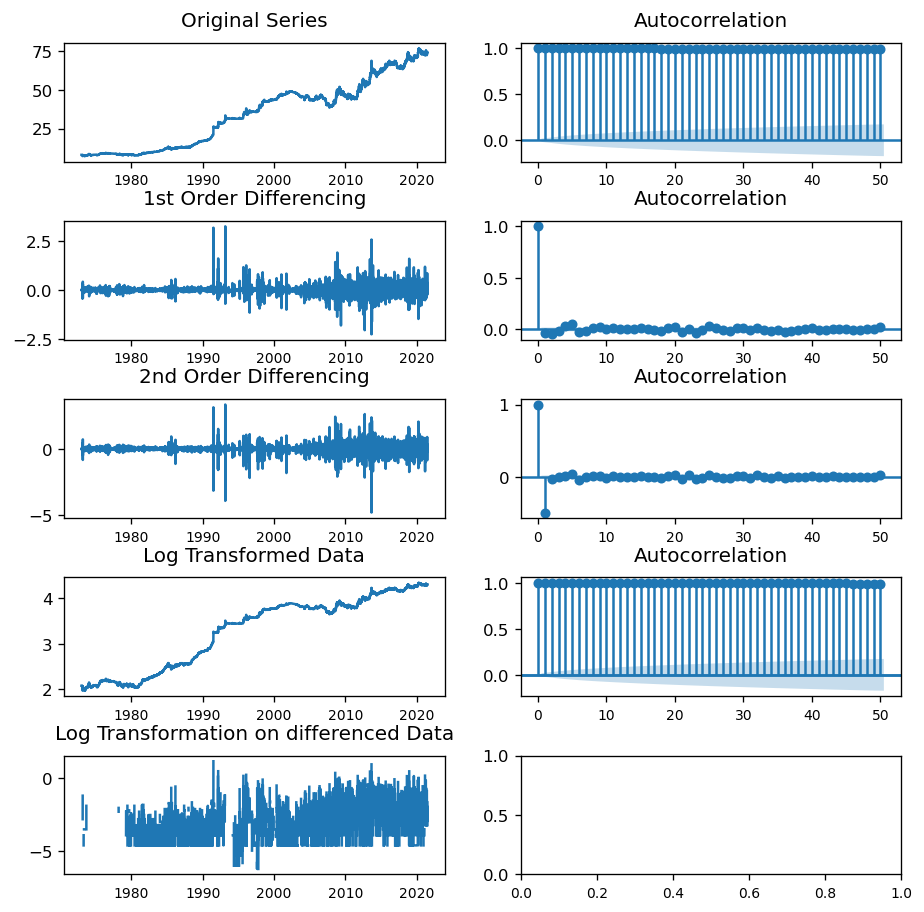

In [42]:
plt.rcParams.update({
    'figure.figsize': (9, 9),
    'figure.dpi': 120,
    'figure.subplot.hspace': 0.5,
    'figure.subplot.wspace': 0.2,
    'xtick.labelsize': 'small'
})
# Original Series
fig, axes = plt.subplots(
    5,
    2,
)  #sharex=True
axes[0, 0].plot(data_impu_na.DEXINUS)
axes[0, 0].set_title('Original Series')
plot_acf(data_impu_na.DEXINUS, ax=axes[0, 1], lags=50)

# 1st Differencing
axes[1, 0].plot(data_impu_na.DEXINUS.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data_impu_na.DEXINUS.diff().dropna(), ax=axes[1, 1], lags=50)

# 2nd Differencing
axes[2, 0].plot(data_impu_na.DEXINUS.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data_impu_na.DEXINUS.diff().diff().dropna(), ax=axes[2, 1], lags=50)

# log Transformation
axes[3, 0].plot(np.log(data_impu_na.DEXINUS))
axes[3, 0].set_title('Log Transformed Data')
plot_acf(np.log(data_impu_na.DEXINUS), ax=axes[3, 1], lags=50)

# log Transformation on 1st Differenced Data
axes[4, 0].plot(np.log(data_impu_na.DEXINUS.diff().dropna()))
axes[4, 0].set_title('Log Transformation on differenced Data')
plot_acf(np.log(data_impu_na.DEXINUS.diff().dropna()), ax=axes[3, 1], lags=50)

plt.tight_layout
plt.show()

In [43]:
print("\n\033[1m",'\033[7m' + '\033[93m' + 'difference and log transformed values',"\033[0m\n")
# print('-----------------------------------------')
ld = pd.DataFrame(pd.concat([data_impu_na.DEXINUS.diff(),
           np.log(data_impu_na.DEXINUS.diff())],
          axis=1,names = ['a','b']))
ld.columns = ['dif_DEX','log_dif_DEX']
ld


 difference and log transformed values 



,dif_DEX,log_dif_DEX
observation_date,,
1973-01-02,NaN,NaN
1973-01-03,0.00,-inf
1973-01-04,-0.02,NaN
1973-01-05,0.01,-4.605170
1973-01-08,-0.01,NaN
...,...,...
2021-06-21,0.04,-3.218876
2021-06-22,0.19,-1.660731
2021-06-23,-0.24,NaN


Observation
---
The table suggests that Data is not stationary across the series. Even though graph indicates that the period 1973 to 1990 is a stationary data, the Augmented Dickey Fuller test proves otherwise. Further it also suggests that even though the trend is different at different periods, 1st order of differencing makes the data stationary.

|Period|	Status|	ADF Statistic|	ADF P-Value|
|------|----------|---------|----------|
|Full Series :- 1973 to 2021|	Original|	0.632001|	0.988378|
|Pre-liberalisation :- 1973 to 1990|	Original|	2.973159|	1.000000|
|Post-Liberalisation :- 1991 to 2021|	Original|	-1.141841|	0.698101|
|Full Series :- 1973 to 2021|	1st order Differencing|	-19.055603|	0.000000|
|Pre-liberalisation :- 1973 to 1990|	1st order Differencing|	-28.386221|	0.000000|
|Post-Liberalisation :- 1991 to 2021|	1st order Differencing|	-37.986572|	0.000000|

Even the plot suggest that 1st order differencing is sufficient. as the auto correlation plot shows 0 for all the lags. 2nd order differencing is over differencing as the 1st lag goes into negative immediately indication over differencing.

Further logarithmic transformation will not make the data stationary but it will definitely remove the increasing variance. So, logarithmic transformation can be applied on a differenced data which has a level but there is increasing variance. 

In our case, 1st order differencing is giving us a stationary data.

# Model Building

We can choose for various models to predict our time series models. As we can see that ours is a univariate time-series model. we will be using the lags of the same time series to predict the values of a definite future. We would like to work on following models. 

* ML models - Regression
* Data-Driven models - Smoothing techniques
* Auto Regressive models - ARIMA, SERIMA, SERIMAX
* NEURAL NETWORKS - ANN, LSTM

## Train Test Split - out of time validation

As we have noted above there are three different trends in the data. Hence, we split the data in three ranges for our model building and testing.

    Firstly   - No / flat trend data till 1989
    secondly  - Upward trend from 1991 till 2001 and from 2008 till date
    thirdly   - Downward trend from 2001 to 2008

### Train Data from 1973

In [44]:
Train = data_impu_na.loc['1973':'2019-06-24']
Test = data_impu_na.loc['2019-6-25':]
print(f'Train shape is : {Train.shape}, and Test Sahpe is : {Test.shape}')

Train shape is : (12125, 4), and Test Sahpe is : (524, 4)


### Train Data from 2008

In [45]:
Train1 = data_impu_na.loc['2008':'2019-06-24']
Test1 = data_impu_na.loc['2019-06-25':]
print(f'Train1 shape is : {Train1.shape}, and Test1 Sahpe is : {Test1.shape}')

Train1 shape is : (2995, 4), and Test1 Sahpe is : (524, 4)


### Train Data from 1991

In [46]:
Train2 = data_impu_na.loc['1992':'2019-06-24']
Test2 = data_impu_na.loc['2019-06-25':]
print(f'Train2 shape is : {Train2.shape}, and Test2 Sahpe is : {Test2.shape}')

Train2 shape is : (7169, 4), and Test2 Sahpe is : (524, 4)


In [47]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Naive Model

Model That will predict the todays price as tomorrows price.

In [48]:
print('\n\033[1m','\033[7m' + '\033[93m' 
      + 'Naive model - predicting Today as Tomorrows Prediction' 
      + '\033[0m\n')

# walk-forward validation
history = [x for x in Train1.DEXINUS.loc['2019-03':'2019-06-24']]
predictions = list()
for i in Test1.index:
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = Test.DEXINUS[i]
    history.append(obs)
    print({'Pred=%.3f, Exp=%.3f' % (yhat, obs)},end = ',        ')
# report performance
# rmse = sqrt(mean_squared_error(test, predictions)
print('\n\n',f'MAPE is : {MAPE(Test1.DEXINUS,predictions):.3f}' )


 Naive model - predicting Today as Tomorrows Prediction

{'Pred=69.320, Exp=69.260'},        {'Pred=69.260, Exp=69.180'},        {'Pred=69.180, Exp=69.010'},        {'Pred=69.010, Exp=68.920'},        {'Pred=68.920, Exp=68.870'},        {'Pred=68.870, Exp=68.870'},        {'Pred=68.870, Exp=68.790'},        {'Pred=68.790, Exp=68.790'},        {'Pred=68.790, Exp=68.480'},        {'Pred=68.480, Exp=68.550'},        {'Pred=68.550, Exp=68.540'},        {'Pred=68.540, Exp=68.400'},        {'Pred=68.400, Exp=68.400'},        {'Pred=68.400, Exp=68.570'},        {'Pred=68.570, Exp=68.520'},        {'Pred=68.520, Exp=68.660'},        {'Pred=68.660, Exp=68.840'},        {'Pred=68.840, Exp=68.850'},        {'Pred=68.850, Exp=68.820'},        {'Pred=68.820, Exp=68.890'},        {'Pred=68.890, Exp=68.990'},        {'Pred=68.990, Exp=68.940'},        {'Pred=68.940, Exp=69.030'},        {'Pred=69.030, Exp=68.890'},        {'Pred=68.890, Exp=68.730'},        {'Pred=68.730, Exp=68.820'},        {'Pred

## Data-Driven models

Models based on smoothing technique

### Simple Exponential Smoothing Model


 Simple Exponential Smooting - Full Data

The Mean Absolute Percentage Error is 5.10 percent


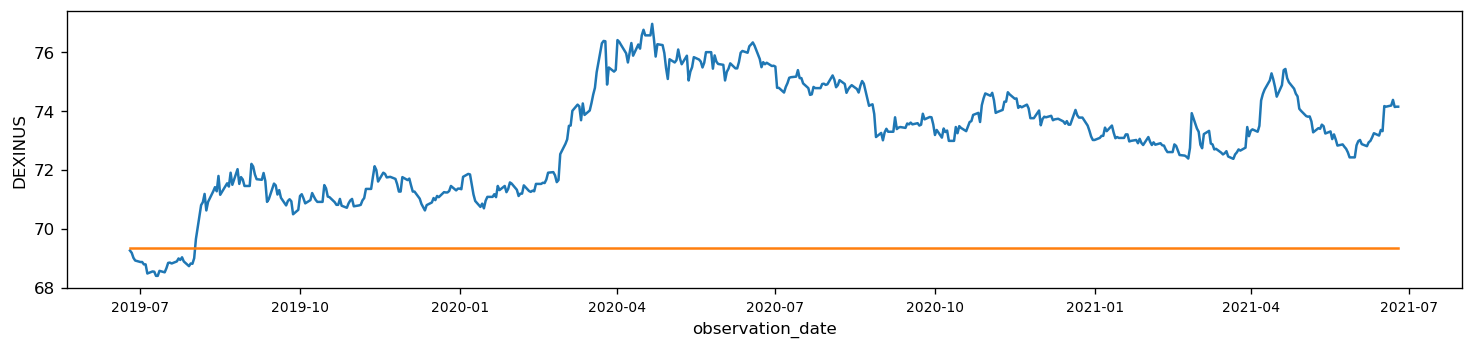

In [49]:
print('\n\033[1m','\033[7m' + '\033[93m' + 'Simple Exponential Smooting - Full Data' + '\033[0m\n')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

ses_model = SimpleExpSmoothing(Train.DEXINUS, 
                               initialization_method='estimated',).fit() #smoothing_level=0.8
# ses_model
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
print(f'The Mean Absolute Percentage Error is {MAPE(pred_ses,Test.DEXINUS):.2f} percent') 
plt.figure(figsize=(15,3))
sns.lineplot(x = Test.index, y = Test.DEXINUS)
sns.lineplot(x = Test.index, y = pred_ses)
plt.show()


 Simple Exponential Smooting - From 2008

The Mean Absolute Percentage Error is 5.05 percent


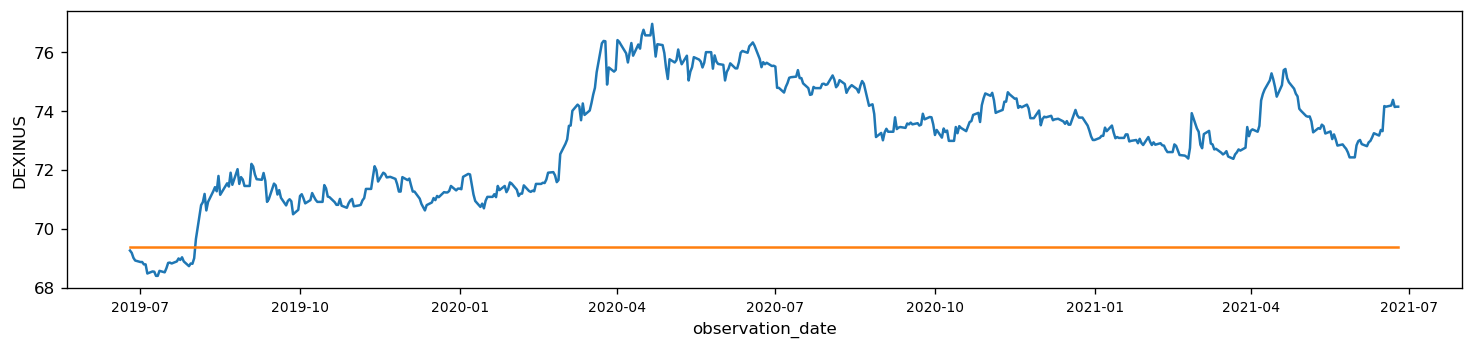

In [50]:
# np.printoptions(precision=2,floatmode='fixed',suppress=True)

print('\n\033[1m','\033[7m' + 'Simple Exponential Smooting - From 2008' + '\033[0m\n')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

ses_model = SimpleExpSmoothing(Train1.DEXINUS, 
                               initialization_method='estimated',).fit(smoothing_level=0.8) #smoothing_level=0.8
# ses_model
pred_ses = ses_model.predict(start = Test1.index[0],end = Test1.index[-1])
print(f'The Mean Absolute Percentage Error is {MAPE(pred_ses,Test1.DEXINUS):.2f} percent') 
plt.figure(figsize=(15,3))
sns.lineplot(x = Test.index, y = Test.DEXINUS)
sns.lineplot(x = Test1.index, y = pred_ses)
plt.show()

### HOLT Simple Exponential Smoothing Method


 HOLT - Simple Exponential Smooting - Full Data

The Mean Absolute Percentage Error is 3.16 percent


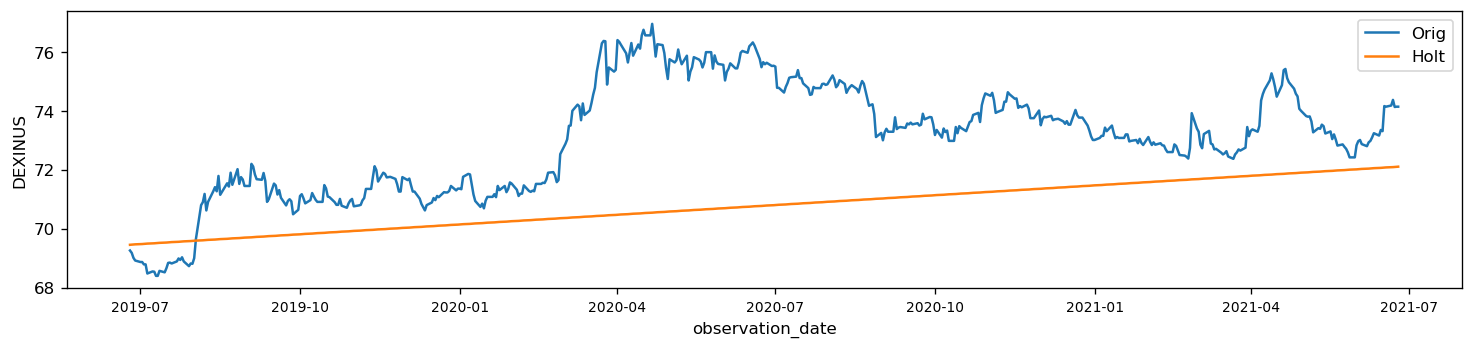

In [51]:
# Holt method 

print('\n\033[1m','\033[7m' + 'HOLT - Simple Exponential Smooting - Full Data' + '\033[0m\n')

hw_model = Holt(Train.DEXINUS, 
                initialization_method='estimated').fit(smoothing_level=0.5, smoothing_trend=0)  #smoothing_level=0.1, smoothing_trend=.0
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

print(f'The Mean Absolute Percentage Error is {MAPE(pred_hw,Test.DEXINUS):.2f} percent')

plt.figure(figsize=(15,3))
sns.lineplot(x = Test.index, y = Test.DEXINUS, label = 'Orig')
sns.lineplot(x = Test.index, y = pred_hw, label = 'Holt')
plt.show()


 HOLT - Simple Exponential Smooting - From 2008

The Mean Absolute Percentage Error is 2.05 percent


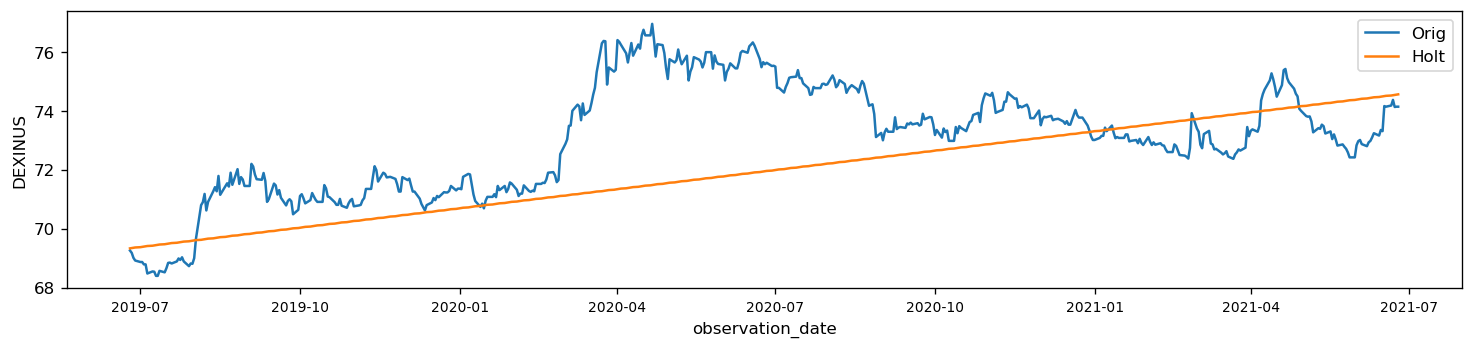

In [52]:
# Holt method 

print('\n\033[1m','\033[7m' + 'HOLT - Simple Exponential Smooting - From 2008' + '\033[0m\n')

hw_model = Holt(Train1.DEXINUS, 
                initialization_method='estimated').fit()  #smoothing_level=0.1, smoothing_trend=.0
pred_hw = hw_model.predict(start = Test1.index[0],end = Test1.index[-1])

print(f'The Mean Absolute Percentage Error is {MAPE(pred_hw,Test1.DEXINUS):.2f} percent')

plt.figure(figsize=(15,3))
sns.lineplot(x = Test.index, y = Test.DEXINUS, label = 'Orig')
sns.lineplot(x = Test1.index, y = pred_hw, label = 'Holt')
plt.show()

### HOLT Exponential Smoothing Method


 HOLT - Exponential Smooting - Full Data

The Mean Absolute Percentage Error is 3.32 percent


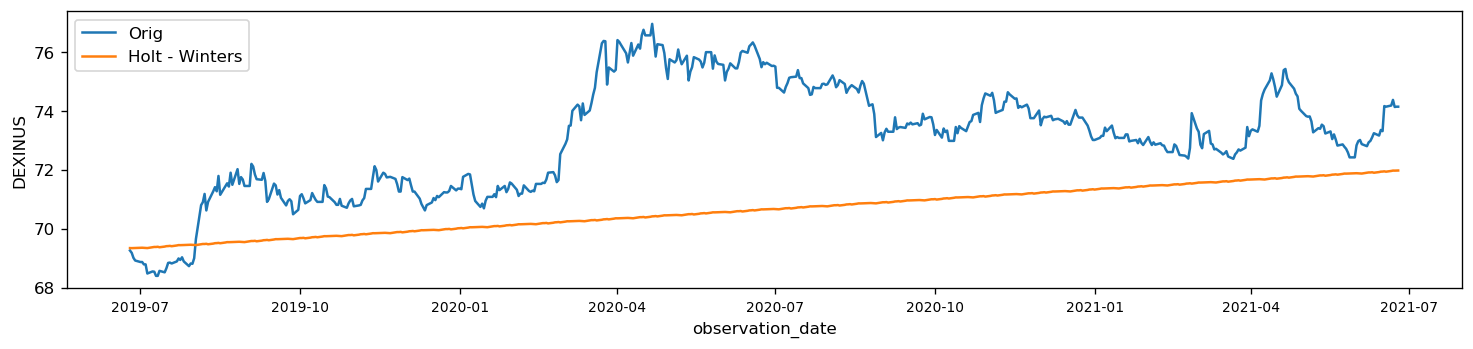

In [53]:
print('\n\033[1m','\033[7m' + 'HOLT - Exponential Smooting - Full Data' + '\033[0m\n')

hwe_model_add_add = ExponentialSmoothing(Train["DEXINUS"],seasonal="add",
                                         trend="add",initialization_method= 'estimated',
                                         seasonal_periods=20).fit() #add the trend to the model
pred_hwe = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

print(f'The Mean Absolute Percentage Error is {MAPE(pred_hwe,Test.DEXINUS):.2f} percent')

plt.figure(figsize=(15,3))
sns.lineplot(x = Test.index, y = Test.DEXINUS, label = 'Orig')
sns.lineplot(x = Test.index, y = pred_hwe, label = 'Holt - Winters')
plt.show()


 HOLT - Exponential Smooting - From 2008

The Mean Absolute Percentage Error is 2.97 percent


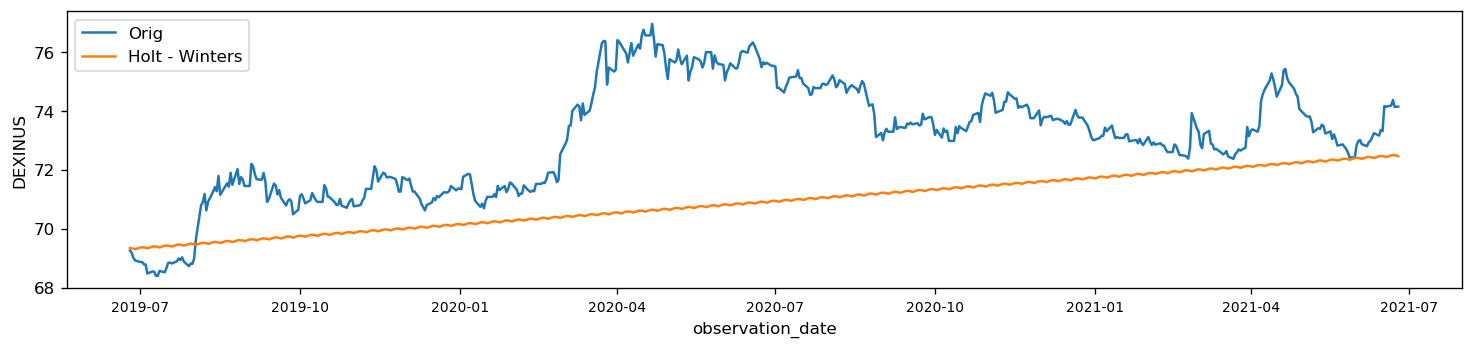

In [54]:
print('\n\033[1m','\033[7m' + 'HOLT - Exponential Smooting - From 2008' + '\033[0m\n')

hwe_model_add_add = ExponentialSmoothing(Train2["DEXINUS"],seasonal="add",
                                         trend="add",initialization_method= 'estimated',
                                         seasonal_periods=5).fit() #add the trend to the model
pred_hwe = hwe_model_add_add.predict(start = Test2.index[0],end = Test2.index[-1])

print(f'The Mean Absolute Percentage Error is {MAPE(pred_hwe,Test2.DEXINUS):.2f} percent')

plt.figure(figsize=(15,3))
sns.lineplot(x = Test.index, y = Test.DEXINUS, label = 'Orig')
sns.lineplot(x = Test2.index, y = pred_hwe, label = 'Holt - Winters')
plt.show()

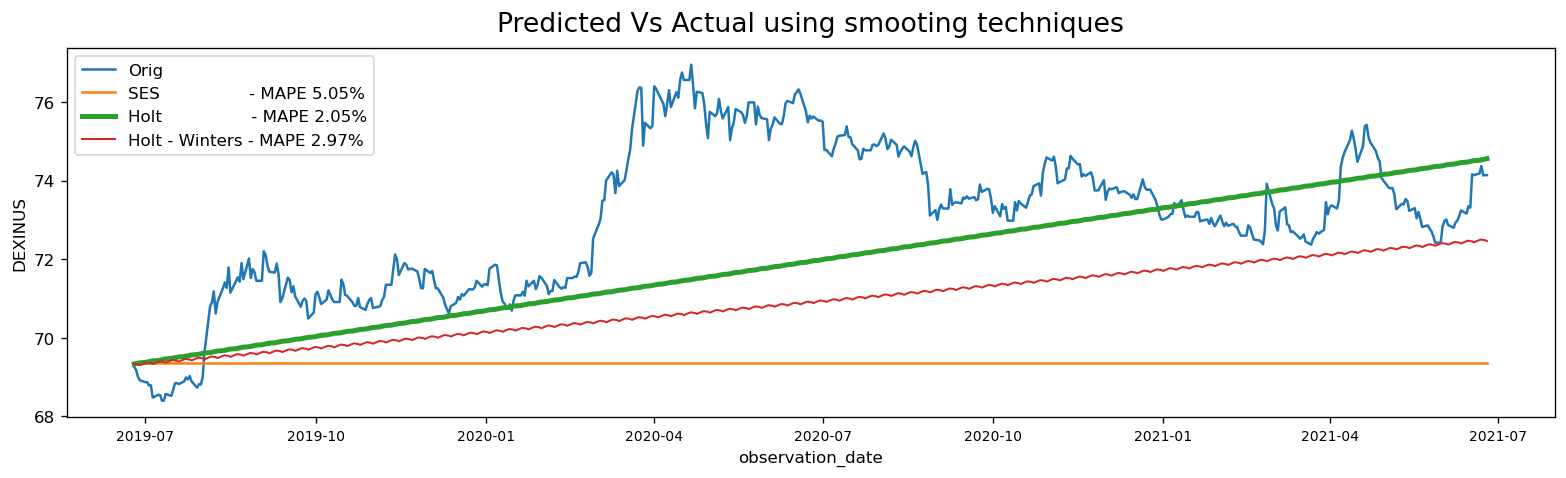

In [55]:
plt.rcParams.update({'axes.titlesize' : 16})
plt.figure(figsize=(16,4))
sns.lineplot(x=Test.index, y = Test.DEXINUS, label='Orig')
sns.lineplot(x=Test1.index, y = pred_ses,label='SES                 - MAPE 5.05%')
sns.lineplot(x=Test1.index, y = pred_hw,label='Holt                 - MAPE 2.05%',lw=3)
sns.lineplot(x = Test2.index, y = pred_hwe, label = 'Holt - Winters - MAPE 2.97%',lw=1.2)
plt.title('Predicted Vs Actual using smooting techniques')
# plt.legend()
plt.show()

## Auto-Regressive models - ARIMA, SERIMA, SERIMAX

We shall use AUTO ARIMA function of PMDARIMA library for building ARIMA/SERIMA models. 

In [56]:
# !pip install pmdarima

In [57]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
import pmdarima as pm

In [58]:
print('\n\033[1m','\033[7m' + '\033[93m'+ 'Finding the Hyperparameter - PMDARIMA - AUTO_ARIMA' + '\033[0m\n')

ARIMA_auto = pm.auto_arima(Train1.DEXINUS, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=10,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True, 
                      maxiter = 300, )
print(ARIMA_auto.summary())


 Finding the Hyperparameter - PMDARIMA - AUTO_ARIMA

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[10] intercept   : AIC=1103.500, Time=2.43 sec
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=1103.242, Time=0.29 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=1106.898, Time=1.08 sec
 ARIMA(0,1,1)(0,0,1)[10] intercept   : AIC=1106.842, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=1104.775, Time=0.11 sec
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=1105.145, Time=0.40 sec
 ARIMA(0,1,0)(0,0,1)[10] intercept   : AIC=1105.149, Time=0.43 sec
 ARIMA(0,1,0)(1,0,1)[10] intercept   : AIC=1107.027, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[10] intercept   : AIC=1104.998, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[10] intercept   : AIC=1104.940, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[10] intercept   : AIC=1101.619, Time=0.73 sec
 ARIMA(1,1,1)(1,0,0)[10] intercept   : AIC=1103.495, Time=1.43 sec
 ARIMA(1,1,1)(1,0,1)[10] intercept   : AIC=inf, Time=6.18 sec
 ARIMA(2,1,1)(0,0,0)[10] intercept   


 ARIMA - FUll Data

The Mean Absolute Percentage error is :- 3.304552392014623 percent


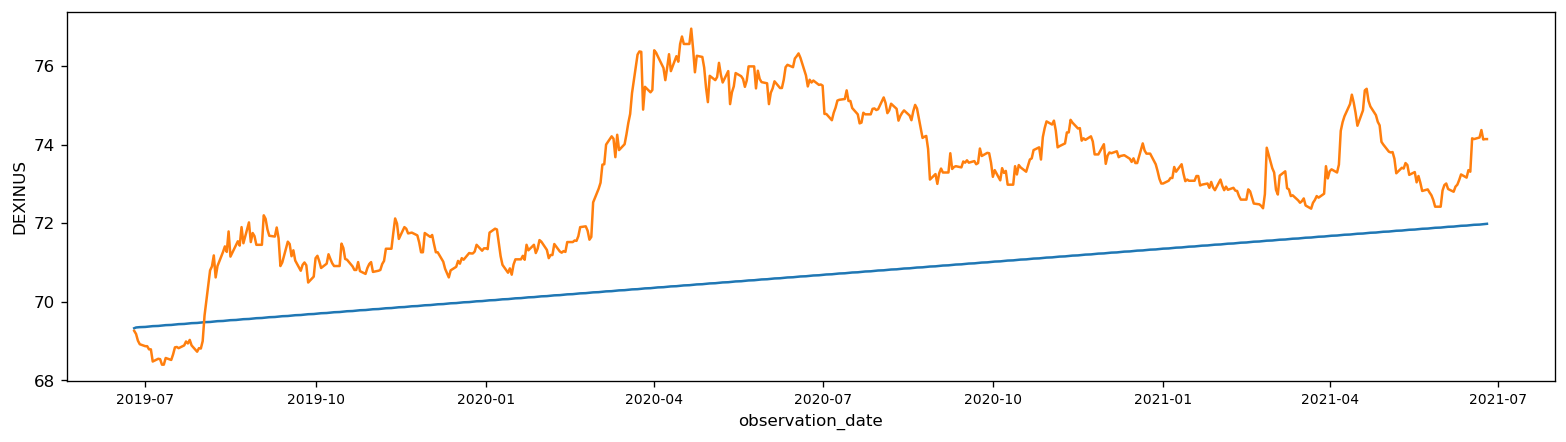

In [59]:
print('\n\033[1m','\033[7m' + '\033[93m'+ 'ARIMA - FUll Data' + '\033[0m\n')

ARIMA_auto.fit(Train.DEXINUS)
AA_pred = ARIMA_auto.predict(524)
print(f'The Mean Absolute Percentage error is :- {MAPE(AA_pred,Test.DEXINUS)} percent')

plt.figure(figsize=(16,4))
sns.lineplot(x=Test.index, y=AA_pred)
sns.lineplot(x = Test.index, y=Test.DEXINUS)
plt.show()


 ARIMA - from 2008

The Mean Absolute Percentage error is :- 2.04 percent


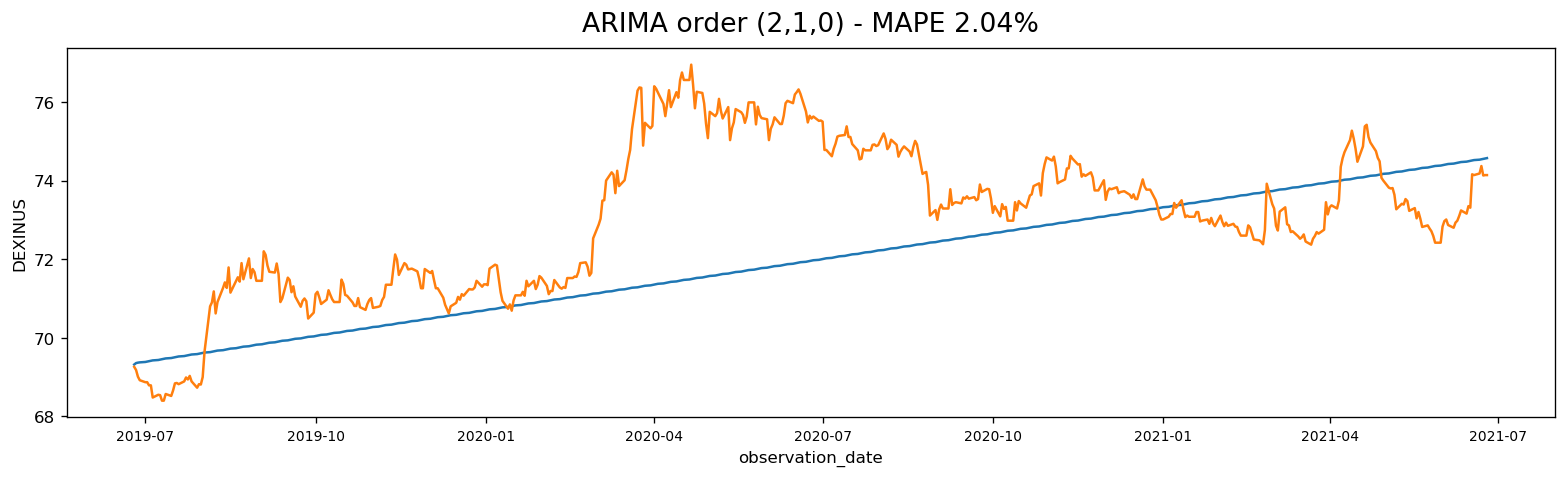

In [60]:
print('\n\033[1m','\033[7m' + '\033[93m'+ 'ARIMA - from 2008' + '\033[0m\n')

ARIMA_auto.fit(Train1.DEXINUS)
AA_pred = ARIMA_auto.predict(524)
print(f'The Mean Absolute Percentage error is :- {MAPE(AA_pred,Test1.DEXINUS):.2f} percent')

plt.figure(figsize=(16,4))
sns.lineplot(x=Test1.index, y=AA_pred)
sns.lineplot(x = Test1.index, y=Test1.DEXINUS)
plt.title('ARIMA order (2,1,0) - MAPE 2.04%')
plt.show()

In [61]:
print('\n\033[1m','\033[7m' + '\033[93m'+ 
      '***ARIMA - from 2008 - Summary()***' + '\033[0m\n')

ARIMA_auto.summary()


 ***ARIMA - from 2008 - Summary()***



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2995
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -535.202
Date:                Tue, 17 Aug 2021   AIC                           1078.405
Time:                        12:45:28   BIC                           1102.422
Sample:                             0   HQIC                          1087.045
                               - 2995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0111      0.005      2.048      0.041       0.000       0.022
ar.L1         -0.0099      0.010     -1.007      0.314      -0.029       0.009
ar.L2         -0.0975      0.011     -8.762      0.000      -0.119      -0.076
sigma2         0.0837      0.001     87.742      0.000       0.082       0.086
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9889.17
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


 ***ARIMA - from 1992***


The Mean Absolute Percentage error is : 2.94 percent


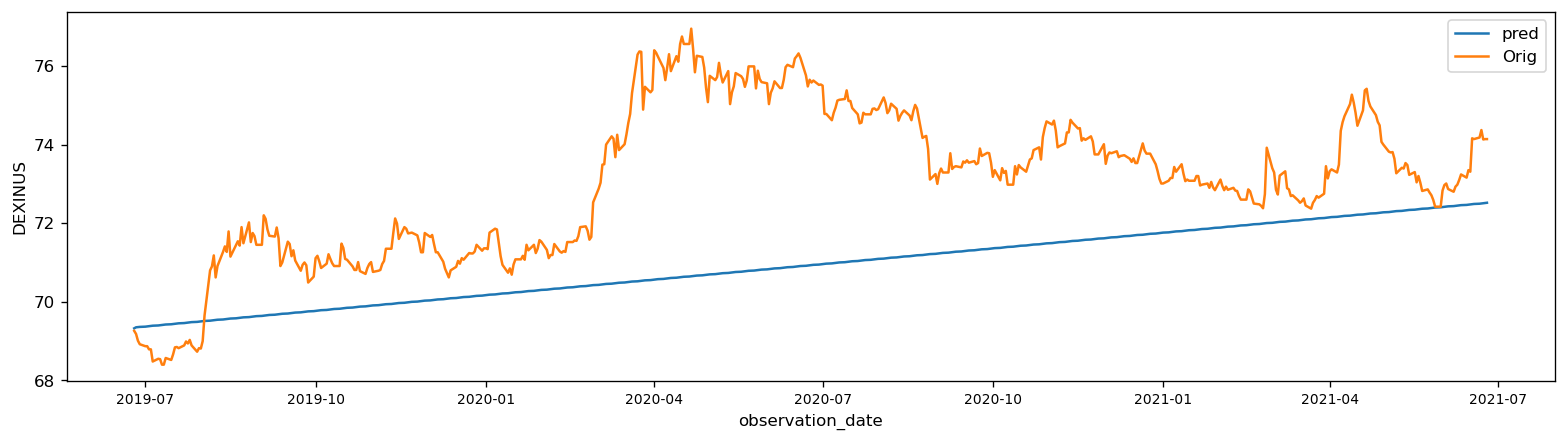

In [62]:
print('\n\033[1m','\033[7m' + '\033[93m'+ 
      '***ARIMA - from 1992***' + '\033[0m\n')

ARIMA_auto.fit(Train2.DEXINUS)
AA_pred = ARIMA_auto.predict(524)
print(f'\nThe Mean Absolute Percentage error is : {MAPE(AA_pred,Test2.DEXINUS):.2f} percent')

plt.figure(figsize=(16,4))
sns.lineplot(x=Test2.index, y=AA_pred,label='pred')
sns.lineplot(x = Test2.index, y=Test2.DEXINUS,label='Orig')
plt.show()

In [63]:
print('\n\033[1m','\033[7m' + '\033[93m'+ 
      '***ARIMA - from 1991 - Summary() - MAPE 2.04%***' + '\033[0m')

ARIMA_auto.summary()


 ***ARIMA - from 1991 - Summary() - MAPE 2.04%***


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7169
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 894.096
Date:                Tue, 17 Aug 2021   AIC                          -1780.192
Time:                        12:45:30   BIC                          -1752.682
Sample:                             0   HQIC                         -1770.724
                               - 7169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0067      0.003      2.561      0.010       0.002       0.012
ar.L1         -0.0330      0.005     -6.740      0.000      -0.043      -0.023
ar.L2         -0.0710      0.006    -12.613      0.000      -0.082      -0.060
sigma2         0.0456      0.000    207.164      0.000       0.045       0.046
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            163023.10
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# print('\n\033[1m','\033[7m' + '\033[93m'+ 
#       '***Statsmodel ARIMA - full Data***' + '\033[0m\n')

# Arima_model = ARIMA(Train.DEXINUS,order=(2,1,0),freq='B')
# Arima_model = Arima_model.fit()
# print(Arima_model.summary())

## NEURAL NETWORKS - ANN, LSTM

Refer another IPYNB file